In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from tqdm import tqdm
import base64

tqdm.pandas()
from wekeypedia import WikipediaPage as Page

In [2]:
name = 'Elke Mackenzie'
dead_name = 'SXZhbg=='
page_name = 'Ivan_Mackenzie_Lamb'
co_date = None

In [3]:
# Parameters
name = "Chelsea Manning"
dead_name = "QnJhZGxleQ=="
page_name = "Chelsea_Manning"
co_date = "2012-08-22"


In [4]:
def format_revid_index(revid, page):
    return f'<a href="https://fr.wikipedia.org/w/index.php?title={page}&diff=prev&oldid={revid}">{revid}</a>'

# qui sont personnes qui énoncent le deadname dans l'article ?

## article

In [5]:
page = Page(page_name, lang='fr')

In [6]:
revisions = (
    pd
    .DataFrame
    .from_records(page.get_revisions())
    .set_index('revid')
)

revisions

,parentid,user,userid,timestamp,size,sha1,contentformat,contentmodel,comment,*,anon
revid,,,,,,,,,,,
213496601,213491465,Anne Daemon,3147955,2024-03-19T22:32:10Z,64956,988a7e2b7870b308da95fbf80c65ba4d7ef2f237,text/x-wiki,wikitext,/* Comité de soutien à Bradley Manning */ (pl...,{{homon|Manning}}\n{{Nom protégé}}\n{{Infobox ...,NaN
213491465,213491334,Cymbella,316223,2024-03-19T18:58:36Z,64975,7118703e079d71433b3c6596b8b99d27c44d8199,text/x-wiki,wikitext,/* Procès */ relecture selon consensus en pdd,{{homon|Manning}}\n{{Nom protégé}}\n{{Infobox ...,NaN
213491334,213491115,Cymbella,316223,2024-03-19T18:51:05Z,65089,7bd1f72f4f44d3c92177694475c2e9114d0da4d8,text/x-wiki,wikitext,/* Poursuites */ relecture selon consensus en pdd,{{homon|Manning}}\n{{Nom protégé}}\n{{Infobox ...,NaN
213491115,213487748,Cymbella,316223,2024-03-19T18:40:41Z,65020,da4ec0146b7a8d5a84cfc97e83e51550c468afd2,text/x-wiki,wikitext,/* Contexte de l'accusation */ relecture selon...,{{homon|Manning}}\n{{Nom protégé}}\n{{Infobox ...,NaN
213487748,213487699,130.125.159.79,0,2024-03-19T16:44:29Z,65052,9fc7685ac48f3b250f6d6b129bbe446650225401,text/x-wiki,wikitext,/* Accusations */ langage plus adapté,{{homon|Manning}}\n{{Nom protégé}}\n{{Infobox ...,
...,...,...,...,...,...,...,...,...,...,...,...
55885071,55855880,82.234.40.89,0,2010-08-05T20:06:06Z,3209,268905c1fab752a4753f263f7b687d9bedc1c411,text/x-wiki,wikitext,,'''Bradley Manning''' (né en 1987) est un anna...,
55855880,55774595,Luckas-bot,414968,2010-08-04T20:07:22Z,3205,a5648276e079e211eb19dbd0a985d04c55f6dd59,text/x-wiki,wikitext,robot Ajoute: [[es:Bradley Manning]],'''Bradley Manning''' (né en 1987) est un anna...,NaN
55774595,55774530,84.164.59.139,0,2010-08-02T09:43:44Z,3182,3367b7c2dbb06761ea755ec510ffe74ec932014d,text/x-wiki,wikitext,création de la page depuis la version englaise...,'''Bradley Manning''' (né en 1987) est un anna...,


In [7]:
revisions.to_csv(f'../data/page-revisions/{page_name.lower()}.csv')

In [8]:
def decode(string):
    return base64.b64decode(string).decode("utf-8")

<Axes: xlabel='date'>

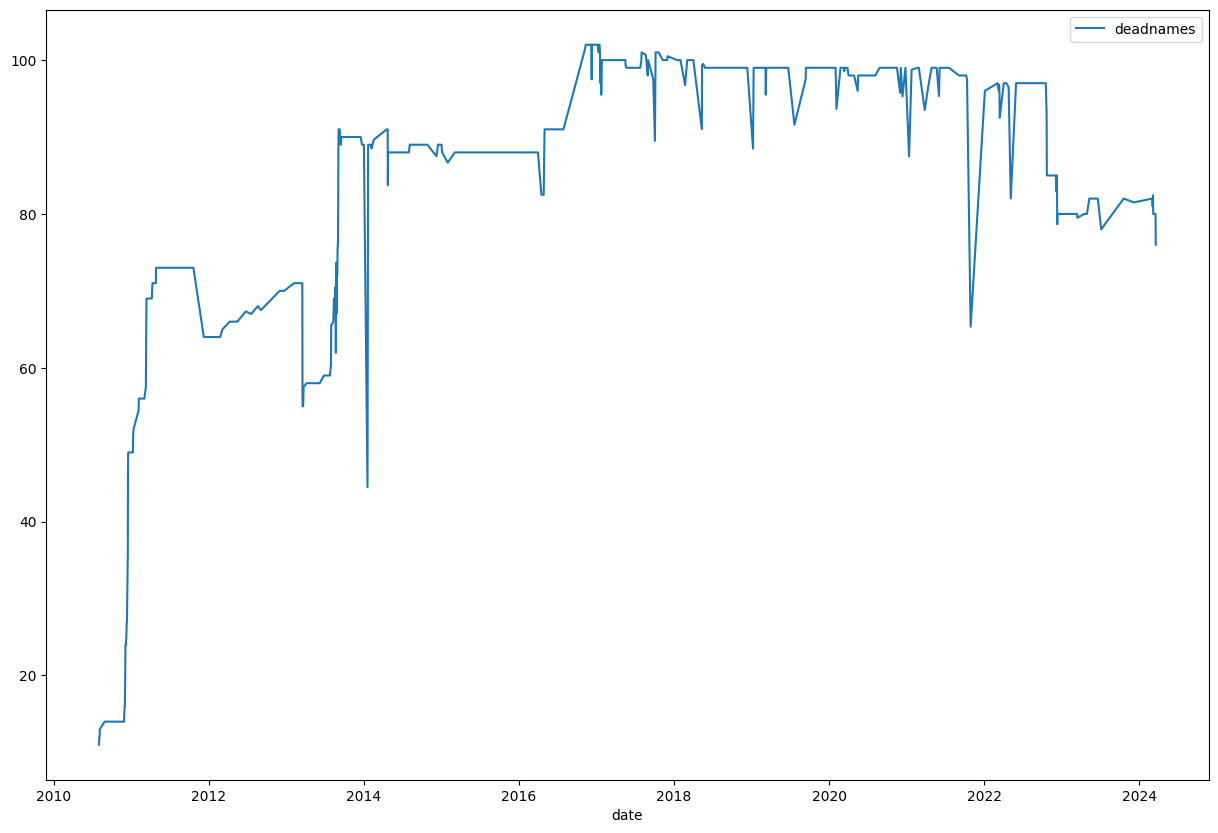

In [9]:
(
    revisions
    .assign(
        deadnames = lambda df: df['*'].apply(lambda x: str(x).lower().count(decode(dead_name).lower()))
    )
    #.reset_index()
    [['timestamp', 'deadnames']]
    .assign(
        date = lambda df: pd.to_datetime(df.timestamp).dt.date
    )
    .groupby('date')
    .agg({'deadnames': 'mean'})
    .plot
    .line(
        figsize=(15,10)
    )
)

In [10]:
def get_diff(revid):
    return page.get_diff(revid)

diffs = revisions.reset_index().revid.progress_apply(lambda x: page.extract_plusminus(get_diff(x))['added'] )

#diffs

  0%|          | 0/1104 [00:00<?, ?it/s]

  0%|          | 2/1104 [00:00<03:03,  5.99it/s]

  0%|          | 3/1104 [00:00<04:18,  4.26it/s]

  0%|          | 4/1104 [00:01<05:32,  3.31it/s]

  0%|          | 5/1104 [00:01<06:18,  2.91it/s]

  1%|          | 6/1104 [00:01<06:06,  3.00it/s]

  1%|          | 7/1104 [00:02<06:03,  3.02it/s]

  1%|          | 8/1104 [00:02<05:56,  3.07it/s]

  1%|          | 9/1104 [00:02<05:55,  3.08it/s]

  1%|          | 10/1104 [00:03<05:53,  3.09it/s]

  1%|          | 11/1104 [00:03<05:44,  3.17it/s]

  1%|          | 12/1104 [00:03<05:41,  3.20it/s]

  1%|          | 13/1104 [00:04<05:51,  3.10it/s]

  1%|▏         | 14/1104 [00:04<05:53,  3.08it/s]

  1%|▏         | 15/1104 [00:04<06:06,  2.97it/s]

  1%|▏         | 16/1104 [00:05<06:52,  2.64it/s]

  2%|▏         | 17/1104 [00:05<06:22,  2.84it/s]

  2%|▏         | 18/1104 [00:05<06:06,  2.97it/s]

  2%|▏         | 19/1104 [00:06<06:11,  2.92it/s]

  2%|▏         | 20/1104 [00:06<06:28,  2.79it/s]

  2%|▏         | 21/1104 [00:06<06:29,  2.78it/s]

  2%|▏         | 22/1104 [00:07<06:16,  2.87it/s]

  2%|▏         | 23/1104 [00:07<06:18,  2.86it/s]

  2%|▏         | 24/1104 [00:07<06:25,  2.80it/s]

  2%|▏         | 25/1104 [00:08<06:14,  2.88it/s]

  2%|▏         | 26/1104 [00:08<06:12,  2.90it/s]

  2%|▏         | 27/1104 [00:08<05:57,  3.02it/s]

  3%|▎         | 28/1104 [00:09<06:01,  2.97it/s]

  3%|▎         | 29/1104 [00:09<06:23,  2.80it/s]

  3%|▎         | 30/1104 [00:10<06:28,  2.76it/s]

  3%|▎         | 31/1104 [00:10<06:17,  2.84it/s]

  3%|▎         | 32/1104 [00:10<06:08,  2.91it/s]

  3%|▎         | 33/1104 [00:11<05:59,  2.98it/s]

  3%|▎         | 34/1104 [00:11<05:54,  3.02it/s]

  3%|▎         | 35/1104 [00:11<05:53,  3.03it/s]

  3%|▎         | 36/1104 [00:12<05:57,  2.99it/s]

  3%|▎         | 37/1104 [00:12<05:51,  3.04it/s]

  3%|▎         | 38/1104 [00:12<06:10,  2.88it/s]

  4%|▎         | 39/1104 [00:13<06:49,  2.60it/s]

  4%|▎         | 40/1104 [00:13<06:39,  2.66it/s]

  4%|▎         | 41/1104 [00:13<06:19,  2.80it/s]

  4%|▍         | 42/1104 [00:14<06:01,  2.94it/s]

  4%|▍         | 43/1104 [00:14<06:56,  2.55it/s]

  4%|▍         | 44/1104 [00:15<06:45,  2.62it/s]

  4%|▍         | 45/1104 [00:15<07:33,  2.34it/s]

  4%|▍         | 46/1104 [00:15<06:49,  2.58it/s]

  4%|▍         | 47/1104 [00:16<06:16,  2.81it/s]

  4%|▍         | 48/1104 [00:16<06:01,  2.92it/s]

  4%|▍         | 49/1104 [00:16<05:55,  2.97it/s]

  5%|▍         | 50/1104 [00:17<06:02,  2.91it/s]

  5%|▍         | 51/1104 [00:17<05:50,  3.01it/s]

  5%|▍         | 52/1104 [00:17<06:39,  2.64it/s]

  5%|▍         | 53/1104 [00:18<06:59,  2.50it/s]

  5%|▍         | 54/1104 [00:18<06:29,  2.70it/s]

  5%|▍         | 55/1104 [00:19<06:12,  2.82it/s]

  5%|▌         | 56/1104 [00:19<05:56,  2.94it/s]

  5%|▌         | 57/1104 [00:19<06:49,  2.56it/s]

  5%|▌         | 58/1104 [00:20<07:25,  2.35it/s]

  5%|▌         | 59/1104 [00:20<06:56,  2.51it/s]

  5%|▌         | 60/1104 [00:20<06:27,  2.69it/s]

  6%|▌         | 61/1104 [00:21<06:14,  2.79it/s]

  6%|▌         | 62/1104 [00:21<06:06,  2.85it/s]

  6%|▌         | 63/1104 [00:22<06:24,  2.71it/s]

  6%|▌         | 64/1104 [00:22<07:06,  2.44it/s]

  6%|▌         | 65/1104 [00:23<07:29,  2.31it/s]

  6%|▌         | 66/1104 [00:23<06:53,  2.51it/s]

  6%|▌         | 67/1104 [00:23<06:26,  2.68it/s]

  6%|▌         | 68/1104 [00:23<06:04,  2.84it/s]

  6%|▋         | 69/1104 [00:24<05:53,  2.93it/s]

  6%|▋         | 70/1104 [00:24<05:46,  2.98it/s]

  6%|▋         | 71/1104 [00:25<06:18,  2.73it/s]

  7%|▋         | 72/1104 [00:25<07:10,  2.40it/s]

  7%|▋         | 73/1104 [00:25<06:38,  2.59it/s]

  7%|▋         | 74/1104 [00:26<07:09,  2.40it/s]

  7%|▋         | 75/1104 [00:26<06:43,  2.55it/s]

  7%|▋         | 76/1104 [00:27<06:20,  2.70it/s]

  7%|▋         | 77/1104 [00:27<06:04,  2.82it/s]

  7%|▋         | 78/1104 [00:27<05:44,  2.97it/s]

  7%|▋         | 79/1104 [00:27<05:37,  3.04it/s]

  7%|▋         | 80/1104 [00:28<05:28,  3.11it/s]

  7%|▋         | 81/1104 [00:28<05:30,  3.09it/s]

  7%|▋         | 82/1104 [00:29<05:53,  2.89it/s]

  8%|▊         | 83/1104 [00:29<06:15,  2.72it/s]

  8%|▊         | 84/1104 [00:29<06:05,  2.79it/s]

  8%|▊         | 85/1104 [00:30<05:55,  2.87it/s]

  8%|▊         | 86/1104 [00:30<05:48,  2.92it/s]

  8%|▊         | 87/1104 [00:30<05:38,  3.00it/s]

  8%|▊         | 88/1104 [00:31<05:32,  3.05it/s]

  8%|▊         | 89/1104 [00:31<05:26,  3.11it/s]

  8%|▊         | 90/1104 [00:31<05:22,  3.15it/s]

  8%|▊         | 91/1104 [00:31<05:19,  3.17it/s]

  8%|▊         | 92/1104 [00:32<05:23,  3.13it/s]

  8%|▊         | 93/1104 [00:32<05:25,  3.10it/s]

  9%|▊         | 94/1104 [00:33<05:43,  2.94it/s]

  9%|▊         | 95/1104 [00:33<06:18,  2.66it/s]

  9%|▊         | 96/1104 [00:33<06:00,  2.80it/s]

  9%|▉         | 97/1104 [00:34<06:13,  2.69it/s]

  9%|▉         | 98/1104 [00:34<05:56,  2.82it/s]

  9%|▉         | 99/1104 [00:34<05:39,  2.96it/s]

  9%|▉         | 100/1104 [00:35<05:59,  2.79it/s]

  9%|▉         | 101/1104 [00:35<05:57,  2.81it/s]

  9%|▉         | 102/1104 [00:35<05:54,  2.82it/s]

  9%|▉         | 103/1104 [00:36<05:32,  3.01it/s]

  9%|▉         | 104/1104 [00:36<05:28,  3.04it/s]

 10%|▉         | 105/1104 [00:36<05:30,  3.02it/s]

 10%|▉         | 106/1104 [00:37<05:23,  3.09it/s]

 10%|▉         | 107/1104 [00:37<05:13,  3.18it/s]

 10%|▉         | 108/1104 [00:37<05:08,  3.23it/s]

 10%|▉         | 109/1104 [00:38<05:02,  3.29it/s]

 10%|▉         | 110/1104 [00:38<04:57,  3.34it/s]

 10%|█         | 111/1104 [00:38<05:22,  3.08it/s]

 10%|█         | 112/1104 [00:39<05:16,  3.13it/s]

 10%|█         | 113/1104 [00:39<05:37,  2.94it/s]

 10%|█         | 114/1104 [00:39<05:50,  2.82it/s]

 10%|█         | 115/1104 [00:40<06:00,  2.74it/s]

 11%|█         | 116/1104 [00:40<05:42,  2.89it/s]

 11%|█         | 117/1104 [00:40<05:36,  2.94it/s]

 11%|█         | 118/1104 [00:41<05:33,  2.96it/s]

 11%|█         | 119/1104 [00:41<05:56,  2.77it/s]

 11%|█         | 120/1104 [00:41<06:16,  2.62it/s]

 11%|█         | 121/1104 [00:42<05:53,  2.78it/s]

 11%|█         | 122/1104 [01:02<1:41:54,  6.23s/it]

 11%|█         | 123/1104 [01:02<1:13:48,  4.51s/it]

 11%|█         | 124/1104 [01:03<53:16,  3.26s/it]  

 11%|█▏        | 125/1104 [01:03<38:57,  2.39s/it]

 11%|█▏        | 126/1104 [01:03<28:48,  1.77s/it]

 12%|█▏        | 127/1104 [01:04<21:35,  1.33s/it]

 12%|█▏        | 128/1104 [01:04<16:38,  1.02s/it]

 12%|█▏        | 129/1104 [01:04<13:24,  1.21it/s]

 12%|█▏        | 130/1104 [01:05<11:36,  1.40it/s]

 12%|█▏        | 131/1104 [01:05<10:14,  1.58it/s]

 12%|█▏        | 132/1104 [01:05<08:40,  1.87it/s]

 12%|█▏        | 133/1104 [01:06<07:25,  2.18it/s]

 12%|█▏        | 134/1104 [01:06<06:47,  2.38it/s]

 12%|█▏        | 135/1104 [01:06<06:25,  2.52it/s]

 12%|█▏        | 136/1104 [01:07<06:00,  2.69it/s]

 12%|█▏        | 137/1104 [01:07<05:42,  2.82it/s]

 12%|█▎        | 138/1104 [01:07<05:29,  2.93it/s]

 13%|█▎        | 139/1104 [01:08<05:22,  2.99it/s]

 13%|█▎        | 140/1104 [01:08<05:18,  3.02it/s]

 13%|█▎        | 141/1104 [01:08<05:17,  3.03it/s]

 13%|█▎        | 142/1104 [01:09<05:20,  3.00it/s]

 13%|█▎        | 143/1104 [01:09<05:20,  2.99it/s]

 13%|█▎        | 144/1104 [01:09<05:15,  3.05it/s]

 13%|█▎        | 145/1104 [01:10<05:06,  3.13it/s]

 13%|█▎        | 146/1104 [01:10<05:05,  3.14it/s]

 13%|█▎        | 147/1104 [01:10<04:59,  3.20it/s]

 13%|█▎        | 148/1104 [01:10<04:57,  3.22it/s]

 13%|█▎        | 149/1104 [01:11<05:00,  3.18it/s]

 14%|█▎        | 150/1104 [01:11<04:57,  3.21it/s]

 14%|█▎        | 151/1104 [01:11<05:05,  3.12it/s]

 14%|█▍        | 152/1104 [01:12<05:03,  3.14it/s]

 14%|█▍        | 153/1104 [01:12<06:27,  2.45it/s]

 14%|█▍        | 154/1104 [01:13<07:39,  2.07it/s]

 14%|█▍        | 155/1104 [01:13<06:52,  2.30it/s]

 14%|█▍        | 156/1104 [01:14<06:23,  2.47it/s]

 14%|█▍        | 157/1104 [01:14<05:56,  2.66it/s]

 14%|█▍        | 158/1104 [01:14<05:39,  2.79it/s]

 14%|█▍        | 159/1104 [01:15<05:22,  2.93it/s]

 14%|█▍        | 160/1104 [01:15<05:17,  2.97it/s]

 15%|█▍        | 161/1104 [01:15<05:12,  3.01it/s]

 15%|█▍        | 162/1104 [01:16<05:38,  2.79it/s]

 15%|█▍        | 163/1104 [01:16<05:51,  2.68it/s]

 15%|█▍        | 164/1104 [01:17<05:58,  2.62it/s]

 15%|█▍        | 165/1104 [01:17<05:41,  2.75it/s]

 15%|█▌        | 166/1104 [01:17<05:29,  2.84it/s]

 15%|█▌        | 167/1104 [01:17<05:19,  2.93it/s]

 15%|█▌        | 168/1104 [01:18<05:17,  2.95it/s]

 15%|█▌        | 169/1104 [01:18<05:14,  2.97it/s]

 15%|█▌        | 170/1104 [01:18<05:00,  3.11it/s]

 15%|█▌        | 171/1104 [01:19<05:03,  3.08it/s]

 16%|█▌        | 172/1104 [01:19<05:01,  3.09it/s]

 16%|█▌        | 173/1104 [01:19<05:25,  2.86it/s]

 16%|█▌        | 174/1104 [01:20<05:17,  2.93it/s]

 16%|█▌        | 175/1104 [01:20<05:09,  3.00it/s]

 16%|█▌        | 176/1104 [01:20<05:07,  3.02it/s]

 16%|█▌        | 177/1104 [01:21<05:15,  2.94it/s]

 16%|█▌        | 178/1104 [01:21<05:05,  3.03it/s]

 16%|█▌        | 179/1104 [01:21<05:00,  3.08it/s]

 16%|█▋        | 180/1104 [01:22<04:55,  3.13it/s]

 16%|█▋        | 181/1104 [01:22<06:22,  2.41it/s]

 16%|█▋        | 182/1104 [01:23<07:32,  2.04it/s]

 17%|█▋        | 183/1104 [01:23<06:39,  2.30it/s]

 17%|█▋        | 184/1104 [01:24<06:03,  2.53it/s]

 17%|█▋        | 185/1104 [01:24<05:40,  2.70it/s]

 17%|█▋        | 186/1104 [01:24<05:31,  2.77it/s]

 17%|█▋        | 187/1104 [01:25<05:18,  2.88it/s]

 17%|█▋        | 188/1104 [01:25<05:11,  2.94it/s]

 17%|█▋        | 189/1104 [01:25<05:00,  3.05it/s]

 17%|█▋        | 190/1104 [01:26<04:52,  3.13it/s]

 17%|█▋        | 191/1104 [01:26<04:48,  3.16it/s]

 17%|█▋        | 192/1104 [01:26<04:42,  3.23it/s]

 17%|█▋        | 193/1104 [01:26<04:39,  3.26it/s]

 18%|█▊        | 194/1104 [01:27<04:38,  3.27it/s]

 18%|█▊        | 195/1104 [01:27<04:41,  3.23it/s]

 18%|█▊        | 196/1104 [01:27<04:53,  3.09it/s]

 18%|█▊        | 197/1104 [01:28<05:06,  2.96it/s]

 18%|█▊        | 198/1104 [01:28<04:58,  3.03it/s]

 18%|█▊        | 199/1104 [01:29<05:19,  2.83it/s]

 18%|█▊        | 200/1104 [01:29<05:37,  2.68it/s]

 18%|█▊        | 201/1104 [01:29<05:48,  2.59it/s]

 18%|█▊        | 202/1104 [01:30<05:30,  2.73it/s]

 18%|█▊        | 203/1104 [01:30<05:14,  2.86it/s]

 18%|█▊        | 204/1104 [01:30<05:11,  2.89it/s]

 19%|█▊        | 205/1104 [01:31<05:04,  2.95it/s]

 19%|█▊        | 206/1104 [01:31<05:15,  2.84it/s]

 19%|█▉        | 207/1104 [01:32<06:06,  2.44it/s]

 19%|█▉        | 208/1104 [01:32<05:42,  2.62it/s]

 19%|█▉        | 209/1104 [01:32<06:21,  2.35it/s]

 19%|█▉        | 210/1104 [01:33<05:50,  2.55it/s]

 19%|█▉        | 211/1104 [01:33<05:19,  2.80it/s]

 19%|█▉        | 212/1104 [01:33<05:10,  2.87it/s]

 19%|█▉        | 213/1104 [01:34<04:58,  2.98it/s]

 19%|█▉        | 214/1104 [01:34<04:52,  3.04it/s]

 19%|█▉        | 215/1104 [01:34<05:03,  2.93it/s]

 20%|█▉        | 216/1104 [01:35<05:03,  2.93it/s]

 20%|█▉        | 217/1104 [01:35<05:00,  2.95it/s]

 20%|█▉        | 218/1104 [01:35<04:54,  3.01it/s]

 20%|█▉        | 219/1104 [01:36<04:48,  3.07it/s]

 20%|█▉        | 220/1104 [01:36<04:47,  3.08it/s]

 20%|██        | 221/1104 [01:36<05:37,  2.62it/s]

 20%|██        | 222/1104 [01:37<05:19,  2.76it/s]

 20%|██        | 223/1104 [01:37<05:11,  2.83it/s]

 20%|██        | 224/1104 [01:37<04:54,  2.99it/s]

 20%|██        | 225/1104 [01:38<04:46,  3.07it/s]

 20%|██        | 226/1104 [01:38<05:29,  2.67it/s]

 21%|██        | 227/1104 [01:39<06:07,  2.39it/s]

 21%|██        | 228/1104 [01:39<05:40,  2.58it/s]

 21%|██        | 229/1104 [01:39<05:22,  2.71it/s]

 21%|██        | 230/1104 [01:40<05:08,  2.83it/s]

 21%|██        | 231/1104 [01:40<05:22,  2.71it/s]

 21%|██        | 232/1104 [01:40<05:31,  2.63it/s]

 21%|██        | 233/1104 [01:41<05:41,  2.55it/s]

 21%|██        | 234/1104 [01:41<05:40,  2.55it/s]

 21%|██▏       | 235/1104 [01:42<05:42,  2.54it/s]

 21%|██▏       | 236/1104 [01:42<05:44,  2.52it/s]

 21%|██▏       | 237/1104 [01:42<05:46,  2.50it/s]

 22%|██▏       | 238/1104 [01:43<05:49,  2.48it/s]

 22%|██▏       | 239/1104 [01:43<05:51,  2.46it/s]

 22%|██▏       | 240/1104 [01:44<05:50,  2.46it/s]

 22%|██▏       | 241/1104 [01:44<06:22,  2.26it/s]

 22%|██▏       | 242/1104 [01:45<06:20,  2.26it/s]

 22%|██▏       | 243/1104 [01:45<05:57,  2.41it/s]

 22%|██▏       | 244/1104 [01:46<06:22,  2.25it/s]

 22%|██▏       | 245/1104 [01:46<06:10,  2.32it/s]

 22%|██▏       | 246/1104 [01:46<05:44,  2.49it/s]

 22%|██▏       | 247/1104 [01:47<05:28,  2.61it/s]

 22%|██▏       | 248/1104 [01:47<05:09,  2.77it/s]

 23%|██▎       | 249/1104 [01:47<04:57,  2.88it/s]

 23%|██▎       | 250/1104 [01:48<05:12,  2.73it/s]

 23%|██▎       | 251/1104 [01:48<05:28,  2.60it/s]

 23%|██▎       | 252/1104 [01:48<05:31,  2.57it/s]

 23%|██▎       | 253/1104 [01:49<05:17,  2.68it/s]

 23%|██▎       | 254/1104 [01:49<05:22,  2.64it/s]

 23%|██▎       | 255/1104 [01:50<05:34,  2.54it/s]

 23%|██▎       | 256/1104 [01:50<05:40,  2.49it/s]

 23%|██▎       | 257/1104 [01:50<05:39,  2.50it/s]

 23%|██▎       | 258/1104 [01:51<05:19,  2.64it/s]

 23%|██▎       | 259/1104 [01:51<05:30,  2.56it/s]

 24%|██▎       | 260/1104 [01:52<05:33,  2.53it/s]

 24%|██▎       | 261/1104 [01:52<05:12,  2.70it/s]

 24%|██▎       | 262/1104 [01:52<05:01,  2.80it/s]

 24%|██▍       | 263/1104 [01:53<04:57,  2.83it/s]

 24%|██▍       | 264/1104 [01:53<04:51,  2.88it/s]

 24%|██▍       | 265/1104 [01:53<04:44,  2.95it/s]

 24%|██▍       | 266/1104 [01:54<04:37,  3.02it/s]

 24%|██▍       | 267/1104 [01:54<04:33,  3.06it/s]

 24%|██▍       | 268/1104 [01:54<04:30,  3.09it/s]

 24%|██▍       | 269/1104 [01:55<05:48,  2.39it/s]

 24%|██▍       | 270/1104 [01:55<05:20,  2.61it/s]

 25%|██▍       | 271/1104 [01:55<05:02,  2.75it/s]

 25%|██▍       | 272/1104 [01:56<04:44,  2.92it/s]

 25%|██▍       | 273/1104 [01:56<04:30,  3.07it/s]

 25%|██▍       | 274/1104 [01:56<04:32,  3.05it/s]

 25%|██▍       | 275/1104 [01:57<04:29,  3.07it/s]

 25%|██▌       | 276/1104 [01:57<05:16,  2.62it/s]

 25%|██▌       | 277/1104 [01:58<05:28,  2.52it/s]

 25%|██▌       | 278/1104 [01:58<05:12,  2.64it/s]

 25%|██▌       | 279/1104 [01:58<05:05,  2.70it/s]

 25%|██▌       | 280/1104 [01:59<04:56,  2.78it/s]

 25%|██▌       | 281/1104 [01:59<04:43,  2.91it/s]

 26%|██▌       | 282/1104 [01:59<04:37,  2.96it/s]

 26%|██▌       | 283/1104 [02:00<04:36,  2.97it/s]

 26%|██▌       | 284/1104 [02:00<04:35,  2.98it/s]

 26%|██▌       | 285/1104 [02:00<04:28,  3.05it/s]

 26%|██▌       | 286/1104 [02:01<04:43,  2.88it/s]

 26%|██▌       | 287/1104 [02:01<05:06,  2.66it/s]

 26%|██▌       | 288/1104 [02:02<05:20,  2.54it/s]

 26%|██▌       | 289/1104 [02:02<05:05,  2.66it/s]

 26%|██▋       | 290/1104 [02:02<04:52,  2.78it/s]

 26%|██▋       | 291/1104 [02:03<05:09,  2.63it/s]

 26%|██▋       | 292/1104 [02:03<04:51,  2.79it/s]

 27%|██▋       | 293/1104 [02:03<05:04,  2.66it/s]

 27%|██▋       | 294/1104 [02:04<04:49,  2.80it/s]

 27%|██▋       | 295/1104 [02:04<04:36,  2.93it/s]

 27%|██▋       | 296/1104 [02:04<04:31,  2.98it/s]

 27%|██▋       | 297/1104 [02:05<04:28,  3.00it/s]

 27%|██▋       | 298/1104 [02:05<04:24,  3.05it/s]

 27%|██▋       | 299/1104 [02:05<04:22,  3.07it/s]

 27%|██▋       | 300/1104 [02:06<04:20,  3.09it/s]

 27%|██▋       | 301/1104 [02:06<04:18,  3.10it/s]

 27%|██▋       | 302/1104 [02:06<04:38,  2.88it/s]

 27%|██▋       | 303/1104 [02:07<04:58,  2.68it/s]

 28%|██▊       | 304/1104 [02:08<07:42,  1.73it/s]

 28%|██▊       | 305/1104 [02:08<07:03,  1.89it/s]

 28%|██▊       | 306/1104 [02:09<06:08,  2.17it/s]

 28%|██▊       | 307/1104 [02:09<05:31,  2.40it/s]

 28%|██▊       | 308/1104 [02:09<05:07,  2.59it/s]

 28%|██▊       | 309/1104 [02:10<05:12,  2.54it/s]

 28%|██▊       | 310/1104 [02:10<05:22,  2.46it/s]

 28%|██▊       | 311/1104 [02:10<05:05,  2.59it/s]

 28%|██▊       | 312/1104 [02:11<04:49,  2.74it/s]

 28%|██▊       | 313/1104 [02:11<04:35,  2.87it/s]

 28%|██▊       | 314/1104 [02:11<04:34,  2.88it/s]

 29%|██▊       | 315/1104 [02:12<04:30,  2.92it/s]

 29%|██▊       | 316/1104 [02:12<04:21,  3.01it/s]

 29%|██▊       | 317/1104 [02:12<04:17,  3.06it/s]

 29%|██▉       | 318/1104 [02:13<04:18,  3.04it/s]

 29%|██▉       | 319/1104 [02:13<04:17,  3.05it/s]

 29%|██▉       | 320/1104 [02:13<04:13,  3.09it/s]

 29%|██▉       | 321/1104 [02:14<04:13,  3.09it/s]

 29%|██▉       | 322/1104 [02:14<04:11,  3.11it/s]

 29%|██▉       | 323/1104 [02:14<04:14,  3.07it/s]

 29%|██▉       | 324/1104 [02:15<04:12,  3.09it/s]

 29%|██▉       | 325/1104 [02:15<04:12,  3.08it/s]

 30%|██▉       | 326/1104 [02:15<04:08,  3.13it/s]

 30%|██▉       | 327/1104 [02:15<04:09,  3.11it/s]

 30%|██▉       | 328/1104 [02:16<04:30,  2.87it/s]

 30%|██▉       | 329/1104 [02:16<04:27,  2.90it/s]

 30%|██▉       | 330/1104 [02:17<04:22,  2.95it/s]

 30%|██▉       | 331/1104 [02:17<04:35,  2.80it/s]

 30%|███       | 332/1104 [02:17<04:27,  2.88it/s]

 30%|███       | 333/1104 [02:18<04:43,  2.72it/s]

 30%|███       | 334/1104 [02:18<04:52,  2.64it/s]

 30%|███       | 335/1104 [02:19<05:03,  2.54it/s]

 30%|███       | 336/1104 [02:19<04:47,  2.67it/s]

 31%|███       | 337/1104 [02:19<04:51,  2.63it/s]

 31%|███       | 338/1104 [02:20<04:55,  2.59it/s]

 31%|███       | 339/1104 [02:20<04:41,  2.71it/s]

 31%|███       | 340/1104 [02:20<04:30,  2.82it/s]

 31%|███       | 341/1104 [02:21<04:22,  2.90it/s]

 31%|███       | 342/1104 [02:21<04:11,  3.03it/s]

 31%|███       | 343/1104 [02:21<04:06,  3.09it/s]

 31%|███       | 344/1104 [02:22<04:06,  3.08it/s]

 31%|███▏      | 345/1104 [02:22<04:03,  3.12it/s]

 31%|███▏      | 346/1104 [02:22<04:04,  3.10it/s]

 31%|███▏      | 347/1104 [02:23<04:09,  3.04it/s]

 32%|███▏      | 348/1104 [02:23<04:10,  3.02it/s]

 32%|███▏      | 349/1104 [02:23<04:33,  2.76it/s]

 32%|███▏      | 350/1104 [02:24<04:36,  2.73it/s]

 32%|███▏      | 351/1104 [02:24<04:25,  2.84it/s]

 32%|███▏      | 352/1104 [02:24<04:20,  2.89it/s]

 32%|███▏      | 353/1104 [02:25<04:11,  2.99it/s]

 32%|███▏      | 354/1104 [02:25<04:12,  2.97it/s]

 32%|███▏      | 355/1104 [02:25<04:05,  3.05it/s]

 32%|███▏      | 356/1104 [02:26<04:08,  3.01it/s]

 32%|███▏      | 357/1104 [02:26<04:04,  3.05it/s]

 32%|███▏      | 358/1104 [02:26<04:04,  3.05it/s]

 33%|███▎      | 359/1104 [02:27<03:59,  3.11it/s]

 33%|███▎      | 360/1104 [02:27<04:41,  2.65it/s]

 33%|███▎      | 361/1104 [02:28<05:13,  2.37it/s]

 33%|███▎      | 362/1104 [02:28<04:54,  2.52it/s]

 33%|███▎      | 363/1104 [02:28<04:36,  2.68it/s]

 33%|███▎      | 364/1104 [02:29<04:22,  2.82it/s]

 33%|███▎      | 365/1104 [02:29<04:19,  2.85it/s]

 33%|███▎      | 366/1104 [02:29<04:15,  2.89it/s]

 33%|███▎      | 367/1104 [02:30<04:05,  3.01it/s]

 33%|███▎      | 368/1104 [02:30<04:00,  3.06it/s]

 33%|███▎      | 369/1104 [02:30<03:55,  3.12it/s]

 34%|███▎      | 370/1104 [02:30<03:51,  3.18it/s]

 34%|███▎      | 371/1104 [02:31<04:22,  2.79it/s]

 34%|███▎      | 372/1104 [02:31<04:15,  2.87it/s]

 34%|███▍      | 373/1104 [02:32<04:06,  2.96it/s]

 34%|███▍      | 374/1104 [02:32<04:02,  3.01it/s]

 34%|███▍      | 375/1104 [02:32<03:58,  3.06it/s]

 34%|███▍      | 376/1104 [02:33<05:08,  2.36it/s]

 34%|███▍      | 377/1104 [02:33<04:45,  2.55it/s]

 34%|███▍      | 378/1104 [02:33<04:24,  2.74it/s]

 34%|███▍      | 379/1104 [02:34<04:30,  2.68it/s]

 34%|███▍      | 380/1104 [02:34<04:15,  2.83it/s]

 35%|███▍      | 381/1104 [02:34<04:05,  2.94it/s]

 35%|███▍      | 382/1104 [02:35<05:24,  2.22it/s]

 35%|███▍      | 383/1104 [02:36<05:16,  2.28it/s]

 35%|███▍      | 384/1104 [02:36<04:50,  2.48it/s]

 35%|███▍      | 385/1104 [02:36<04:34,  2.62it/s]

 35%|███▍      | 386/1104 [02:37<04:22,  2.74it/s]

 35%|███▌      | 387/1104 [02:37<04:08,  2.88it/s]

 35%|███▌      | 388/1104 [02:37<04:02,  2.95it/s]

 35%|███▌      | 389/1104 [02:38<03:54,  3.05it/s]

 35%|███▌      | 390/1104 [02:38<03:45,  3.17it/s]

 35%|███▌      | 391/1104 [02:38<03:47,  3.13it/s]

 36%|███▌      | 392/1104 [02:38<03:49,  3.10it/s]

 36%|███▌      | 393/1104 [02:39<03:54,  3.03it/s]

 36%|███▌      | 394/1104 [02:40<06:13,  1.90it/s]

 36%|███▌      | 395/1104 [02:40<05:22,  2.20it/s]

 36%|███▌      | 396/1104 [02:40<04:49,  2.45it/s]

 36%|███▌      | 397/1104 [02:41<04:28,  2.64it/s]

 36%|███▌      | 398/1104 [02:41<04:38,  2.53it/s]

 36%|███▌      | 399/1104 [02:41<04:19,  2.72it/s]

 36%|███▌      | 400/1104 [02:42<04:02,  2.90it/s]

 36%|███▋      | 401/1104 [02:42<03:51,  3.03it/s]

 36%|███▋      | 402/1104 [02:42<03:45,  3.11it/s]

 37%|███▋      | 403/1104 [02:43<03:44,  3.12it/s]

 37%|███▋      | 404/1104 [02:43<04:24,  2.64it/s]

 37%|███▋      | 405/1104 [02:44<04:56,  2.36it/s]

 37%|███▋      | 406/1104 [02:44<04:32,  2.56it/s]

 37%|███▋      | 407/1104 [02:44<04:18,  2.70it/s]

 37%|███▋      | 408/1104 [02:45<04:03,  2.86it/s]

 37%|███▋      | 409/1104 [02:45<04:01,  2.88it/s]

 37%|███▋      | 410/1104 [02:45<04:14,  2.73it/s]

 37%|███▋      | 411/1104 [02:46<04:01,  2.87it/s]

 37%|███▋      | 412/1104 [02:46<03:55,  2.93it/s]

 37%|███▋      | 413/1104 [02:46<04:12,  2.73it/s]

 38%|███▊      | 414/1104 [02:47<04:20,  2.65it/s]

 38%|███▊      | 415/1104 [02:47<04:07,  2.78it/s]

 38%|███▊      | 416/1104 [02:47<03:57,  2.90it/s]

 38%|███▊      | 417/1104 [02:48<03:55,  2.91it/s]

 38%|███▊      | 418/1104 [02:48<03:55,  2.91it/s]

 38%|███▊      | 419/1104 [02:48<03:49,  2.98it/s]

 38%|███▊      | 420/1104 [02:49<03:59,  2.86it/s]

 38%|███▊      | 421/1104 [02:49<03:54,  2.91it/s]

 38%|███▊      | 422/1104 [02:50<03:56,  2.88it/s]

 38%|███▊      | 423/1104 [02:50<03:51,  2.94it/s]

 38%|███▊      | 424/1104 [02:50<03:44,  3.02it/s]

 38%|███▊      | 425/1104 [02:50<03:45,  3.01it/s]

 39%|███▊      | 426/1104 [02:51<03:39,  3.09it/s]

 39%|███▊      | 427/1104 [02:51<03:42,  3.04it/s]

 39%|███▉      | 428/1104 [02:51<03:40,  3.07it/s]

 39%|███▉      | 429/1104 [02:52<03:42,  3.04it/s]

 39%|███▉      | 430/1104 [02:52<04:05,  2.74it/s]

 39%|███▉      | 431/1104 [02:53<03:54,  2.87it/s]

 39%|███▉      | 432/1104 [02:53<03:47,  2.95it/s]

 39%|███▉      | 433/1104 [02:53<03:43,  3.00it/s]

 39%|███▉      | 434/1104 [02:53<03:37,  3.08it/s]

 39%|███▉      | 435/1104 [02:54<04:10,  2.67it/s]

 39%|███▉      | 436/1104 [02:54<04:18,  2.59it/s]

 40%|███▉      | 437/1104 [02:55<04:01,  2.76it/s]

 40%|███▉      | 438/1104 [02:55<03:52,  2.86it/s]

 40%|███▉      | 439/1104 [02:55<03:46,  2.93it/s]

 40%|███▉      | 440/1104 [02:56<04:16,  2.59it/s]

 40%|███▉      | 441/1104 [02:56<04:59,  2.21it/s]

 40%|████      | 442/1104 [02:57<04:52,  2.27it/s]

 40%|████      | 443/1104 [02:57<04:44,  2.33it/s]

 40%|████      | 444/1104 [02:58<04:39,  2.37it/s]

 40%|████      | 445/1104 [02:58<04:35,  2.39it/s]

 40%|████      | 446/1104 [02:58<04:17,  2.56it/s]

 40%|████      | 447/1104 [02:59<04:07,  2.66it/s]

 41%|████      | 448/1104 [02:59<04:00,  2.73it/s]

 41%|████      | 449/1104 [02:59<04:08,  2.64it/s]

 41%|████      | 450/1104 [03:00<03:56,  2.77it/s]

 41%|████      | 451/1104 [03:00<03:41,  2.95it/s]

 41%|████      | 452/1104 [03:00<03:34,  3.03it/s]

 41%|████      | 453/1104 [03:01<03:28,  3.13it/s]

 41%|████      | 454/1104 [03:01<03:26,  3.14it/s]

 41%|████      | 455/1104 [03:01<03:24,  3.17it/s]

 41%|████▏     | 456/1104 [03:02<03:23,  3.19it/s]

 41%|████▏     | 457/1104 [03:02<03:23,  3.18it/s]

 41%|████▏     | 458/1104 [03:02<03:40,  2.93it/s]

 42%|████▏     | 459/1104 [03:03<03:34,  3.00it/s]

 42%|████▏     | 460/1104 [03:03<03:46,  2.85it/s]

 42%|████▏     | 461/1104 [03:04<04:20,  2.47it/s]

 42%|████▏     | 462/1104 [03:04<04:52,  2.20it/s]

 42%|████▏     | 463/1104 [03:04<04:26,  2.41it/s]

 42%|████▏     | 464/1104 [03:05<04:05,  2.60it/s]

 42%|████▏     | 465/1104 [03:05<03:51,  2.77it/s]

 42%|████▏     | 466/1104 [03:05<03:41,  2.88it/s]

 42%|████▏     | 467/1104 [03:06<03:29,  3.04it/s]

 42%|████▏     | 468/1104 [03:06<03:26,  3.07it/s]

 42%|████▏     | 469/1104 [03:06<03:22,  3.13it/s]

 43%|████▎     | 470/1104 [03:07<04:15,  2.48it/s]

 43%|████▎     | 471/1104 [03:07<03:56,  2.68it/s]

 43%|████▎     | 472/1104 [03:08<03:46,  2.79it/s]

 43%|████▎     | 473/1104 [03:08<03:39,  2.87it/s]

 43%|████▎     | 474/1104 [03:08<04:14,  2.47it/s]

 43%|████▎     | 475/1104 [03:09<04:00,  2.62it/s]

 43%|████▎     | 476/1104 [03:09<03:47,  2.76it/s]

 43%|████▎     | 477/1104 [03:09<03:39,  2.85it/s]

 43%|████▎     | 478/1104 [03:10<03:33,  2.94it/s]

 43%|████▎     | 479/1104 [03:10<03:32,  2.95it/s]

 43%|████▎     | 480/1104 [03:10<03:30,  2.96it/s]

 44%|████▎     | 481/1104 [03:11<03:21,  3.09it/s]

 44%|████▎     | 482/1104 [03:11<03:19,  3.11it/s]

 44%|████▍     | 483/1104 [03:11<03:23,  3.05it/s]

 44%|████▍     | 484/1104 [03:12<03:56,  2.62it/s]

 44%|████▍     | 485/1104 [03:12<03:55,  2.63it/s]

 44%|████▍     | 486/1104 [03:13<03:43,  2.77it/s]

 44%|████▍     | 487/1104 [03:13<03:31,  2.92it/s]

 44%|████▍     | 488/1104 [03:13<03:29,  2.94it/s]

 44%|████▍     | 489/1104 [03:14<03:34,  2.87it/s]

 44%|████▍     | 490/1104 [03:14<03:25,  2.99it/s]

 44%|████▍     | 491/1104 [03:14<03:21,  3.05it/s]

 45%|████▍     | 492/1104 [03:14<03:19,  3.07it/s]

 45%|████▍     | 493/1104 [03:15<03:14,  3.14it/s]

 45%|████▍     | 494/1104 [03:15<03:13,  3.16it/s]

 45%|████▍     | 495/1104 [03:15<03:14,  3.14it/s]

 45%|████▍     | 496/1104 [03:16<03:11,  3.18it/s]

 45%|████▌     | 497/1104 [03:16<03:12,  3.15it/s]

 45%|████▌     | 498/1104 [03:16<03:35,  2.82it/s]

 45%|████▌     | 499/1104 [03:17<03:28,  2.91it/s]

 45%|████▌     | 500/1104 [03:17<03:42,  2.71it/s]

 45%|████▌     | 501/1104 [03:18<03:43,  2.70it/s]

 45%|████▌     | 502/1104 [03:18<03:34,  2.81it/s]

 46%|████▌     | 503/1104 [03:18<04:12,  2.38it/s]

 46%|████▌     | 504/1104 [03:19<04:29,  2.23it/s]

 46%|████▌     | 505/1104 [03:20<04:42,  2.12it/s]

 46%|████▌     | 506/1104 [03:20<04:19,  2.31it/s]

 46%|████▌     | 507/1104 [03:20<03:59,  2.49it/s]

 46%|████▌     | 508/1104 [03:21<03:45,  2.64it/s]

 46%|████▌     | 509/1104 [03:21<03:49,  2.59it/s]

 46%|████▌     | 510/1104 [03:21<03:39,  2.71it/s]

 46%|████▋     | 511/1104 [03:22<03:36,  2.74it/s]

 46%|████▋     | 512/1104 [03:22<03:35,  2.74it/s]

 46%|████▋     | 513/1104 [03:23<04:05,  2.41it/s]

 47%|████▋     | 514/1104 [03:23<04:06,  2.40it/s]

 47%|████▋     | 515/1104 [03:23<04:06,  2.39it/s]

 47%|████▋     | 516/1104 [03:24<03:42,  2.65it/s]

 47%|████▋     | 517/1104 [03:24<03:36,  2.71it/s]

 47%|████▋     | 518/1104 [03:24<03:25,  2.85it/s]

 47%|████▋     | 519/1104 [03:25<03:22,  2.89it/s]

 47%|████▋     | 520/1104 [03:25<03:49,  2.55it/s]

 47%|████▋     | 521/1104 [03:26<04:09,  2.34it/s]

 47%|████▋     | 522/1104 [03:26<04:20,  2.23it/s]

 47%|████▋     | 523/1104 [03:27<04:34,  2.12it/s]

 47%|████▋     | 524/1104 [03:27<04:46,  2.02it/s]

 48%|████▊     | 525/1104 [03:27<04:11,  2.30it/s]

 48%|████▊     | 526/1104 [03:28<03:50,  2.51it/s]

 48%|████▊     | 527/1104 [03:28<03:41,  2.61it/s]

 48%|████▊     | 528/1104 [03:28<03:29,  2.76it/s]

 48%|████▊     | 529/1104 [03:29<03:51,  2.48it/s]

 48%|████▊     | 530/1104 [03:29<03:48,  2.52it/s]

 48%|████▊     | 531/1104 [03:30<04:05,  2.34it/s]

 48%|████▊     | 532/1104 [03:30<03:59,  2.39it/s]

 48%|████▊     | 533/1104 [03:31<03:58,  2.40it/s]

 48%|████▊     | 534/1104 [03:31<03:42,  2.56it/s]

 48%|████▊     | 535/1104 [03:31<03:31,  2.69it/s]

 49%|████▊     | 536/1104 [03:32<03:21,  2.82it/s]

 49%|████▊     | 537/1104 [03:32<03:11,  2.97it/s]

 49%|████▊     | 538/1104 [03:32<03:10,  2.98it/s]

 49%|████▉     | 539/1104 [03:33<03:08,  3.00it/s]

 49%|████▉     | 540/1104 [03:33<03:04,  3.05it/s]

 49%|████▉     | 541/1104 [03:33<03:00,  3.13it/s]

 49%|████▉     | 542/1104 [03:34<02:59,  3.14it/s]

 49%|████▉     | 543/1104 [03:34<02:57,  3.17it/s]

 49%|████▉     | 544/1104 [03:34<02:52,  3.24it/s]

 49%|████▉     | 545/1104 [03:34<03:02,  3.06it/s]

 49%|████▉     | 546/1104 [03:35<03:06,  2.99it/s]

 50%|████▉     | 547/1104 [03:35<03:09,  2.94it/s]

 50%|████▉     | 548/1104 [03:36<03:04,  3.01it/s]

 50%|████▉     | 549/1104 [03:36<03:11,  2.90it/s]

 50%|████▉     | 550/1104 [03:36<03:07,  2.96it/s]

 50%|████▉     | 551/1104 [03:37<03:01,  3.04it/s]

 50%|█████     | 552/1104 [03:37<03:02,  3.03it/s]

 50%|█████     | 553/1104 [03:37<03:03,  3.00it/s]

 50%|█████     | 554/1104 [03:38<03:02,  3.02it/s]

 50%|█████     | 555/1104 [03:40<09:09,  1.00s/it]

 50%|█████     | 556/1104 [03:40<07:13,  1.26it/s]

 50%|█████     | 557/1104 [03:41<05:54,  1.54it/s]

 51%|█████     | 558/1104 [03:41<05:02,  1.81it/s]

 51%|█████     | 559/1104 [03:41<04:26,  2.04it/s]

 51%|█████     | 560/1104 [03:42<04:00,  2.26it/s]

 51%|█████     | 561/1104 [03:42<03:40,  2.47it/s]

 51%|█████     | 562/1104 [03:42<03:24,  2.65it/s]

 51%|█████     | 563/1104 [03:43<03:17,  2.74it/s]

 51%|█████     | 564/1104 [03:43<03:27,  2.60it/s]

 51%|█████     | 565/1104 [03:44<03:33,  2.52it/s]

 51%|█████▏    | 566/1104 [03:44<03:20,  2.68it/s]

 51%|█████▏    | 567/1104 [03:44<03:17,  2.72it/s]

 51%|█████▏    | 568/1104 [03:45<03:07,  2.86it/s]

 52%|█████▏    | 569/1104 [03:45<03:01,  2.95it/s]

 52%|█████▏    | 570/1104 [03:45<02:59,  2.98it/s]

 52%|█████▏    | 571/1104 [03:46<03:31,  2.52it/s]

 52%|█████▏    | 572/1104 [03:46<03:49,  2.32it/s]

 52%|█████▏    | 573/1104 [03:47<03:31,  2.51it/s]

 52%|█████▏    | 574/1104 [03:47<03:16,  2.69it/s]

 52%|█████▏    | 575/1104 [03:47<03:09,  2.80it/s]

 52%|█████▏    | 576/1104 [03:48<03:10,  2.77it/s]

 52%|█████▏    | 577/1104 [03:48<03:03,  2.87it/s]

 52%|█████▏    | 578/1104 [03:48<02:57,  2.97it/s]

 52%|█████▏    | 579/1104 [03:48<02:54,  3.01it/s]

 53%|█████▎    | 580/1104 [03:49<02:50,  3.07it/s]

 53%|█████▎    | 581/1104 [03:49<02:49,  3.08it/s]

 53%|█████▎    | 582/1104 [03:50<03:02,  2.86it/s]

 53%|█████▎    | 583/1104 [03:50<02:58,  2.92it/s]

 53%|█████▎    | 584/1104 [03:50<02:54,  2.99it/s]

 53%|█████▎    | 585/1104 [03:50<02:52,  3.01it/s]

 53%|█████▎    | 586/1104 [03:51<02:49,  3.05it/s]

 53%|█████▎    | 587/1104 [03:51<02:47,  3.08it/s]

 53%|█████▎    | 588/1104 [03:51<02:49,  3.04it/s]

 53%|█████▎    | 589/1104 [03:52<02:50,  3.03it/s]

 53%|█████▎    | 590/1104 [03:52<02:45,  3.11it/s]

 54%|█████▎    | 591/1104 [03:52<02:46,  3.09it/s]

 54%|█████▎    | 592/1104 [03:53<02:47,  3.06it/s]

 54%|█████▎    | 593/1104 [03:53<03:00,  2.83it/s]

 54%|█████▍    | 594/1104 [03:54<03:12,  2.64it/s]

 54%|█████▍    | 595/1104 [03:54<03:20,  2.53it/s]

 54%|█████▍    | 596/1104 [03:54<03:08,  2.70it/s]

 54%|█████▍    | 597/1104 [03:55<02:59,  2.82it/s]

 54%|█████▍    | 598/1104 [03:55<02:53,  2.91it/s]

 54%|█████▍    | 599/1104 [03:55<02:47,  3.02it/s]

 54%|█████▍    | 600/1104 [03:56<02:40,  3.14it/s]

 54%|█████▍    | 601/1104 [03:56<02:40,  3.14it/s]

 55%|█████▍    | 602/1104 [03:56<02:44,  3.05it/s]

 55%|█████▍    | 603/1104 [03:57<02:44,  3.04it/s]

 55%|█████▍    | 604/1104 [03:57<02:55,  2.86it/s]

 55%|█████▍    | 605/1104 [03:57<02:50,  2.92it/s]

 55%|█████▍    | 606/1104 [03:58<02:47,  2.97it/s]

 55%|█████▍    | 607/1104 [03:58<02:43,  3.03it/s]

 55%|█████▌    | 608/1104 [03:58<02:42,  3.06it/s]

 55%|█████▌    | 609/1104 [03:59<02:39,  3.10it/s]

 55%|█████▌    | 610/1104 [03:59<02:39,  3.10it/s]

 55%|█████▌    | 611/1104 [03:59<02:50,  2.89it/s]

 55%|█████▌    | 612/1104 [04:00<02:46,  2.95it/s]

 56%|█████▌    | 613/1104 [04:00<02:43,  3.01it/s]

 56%|█████▌    | 614/1104 [04:00<02:40,  3.05it/s]

 56%|█████▌    | 615/1104 [04:01<02:39,  3.06it/s]

 56%|█████▌    | 616/1104 [04:01<02:33,  3.18it/s]

 56%|█████▌    | 617/1104 [04:01<02:33,  3.18it/s]

 56%|█████▌    | 618/1104 [04:02<02:34,  3.14it/s]

 56%|█████▌    | 619/1104 [04:02<02:35,  3.13it/s]

 56%|█████▌    | 620/1104 [04:02<02:35,  3.11it/s]

 56%|█████▋    | 621/1104 [04:02<02:36,  3.08it/s]

 56%|█████▋    | 622/1104 [04:03<02:39,  3.02it/s]

 56%|█████▋    | 623/1104 [04:03<02:38,  3.04it/s]

 57%|█████▋    | 624/1104 [04:03<02:39,  3.01it/s]

 57%|█████▋    | 625/1104 [04:04<02:42,  2.95it/s]

 57%|█████▋    | 626/1104 [04:04<02:39,  3.00it/s]

 57%|█████▋    | 627/1104 [04:04<02:37,  3.03it/s]

 57%|█████▋    | 628/1104 [04:05<02:34,  3.08it/s]

 57%|█████▋    | 629/1104 [04:05<02:59,  2.65it/s]

 57%|█████▋    | 630/1104 [04:06<03:05,  2.55it/s]

 57%|█████▋    | 631/1104 [04:06<02:57,  2.67it/s]

 57%|█████▋    | 632/1104 [04:06<02:53,  2.72it/s]

 57%|█████▋    | 633/1104 [04:07<02:46,  2.84it/s]

 57%|█████▋    | 634/1104 [04:07<02:42,  2.90it/s]

 58%|█████▊    | 635/1104 [04:07<02:38,  2.96it/s]

 58%|█████▊    | 636/1104 [04:08<02:34,  3.02it/s]

 58%|█████▊    | 637/1104 [04:08<02:35,  3.01it/s]

 58%|█████▊    | 638/1104 [04:08<02:31,  3.07it/s]

 58%|█████▊    | 639/1104 [04:09<02:32,  3.04it/s]

 58%|█████▊    | 640/1104 [04:09<02:38,  2.94it/s]

 58%|█████▊    | 641/1104 [04:09<02:37,  2.94it/s]

 58%|█████▊    | 642/1104 [04:10<02:40,  2.88it/s]

 58%|█████▊    | 643/1104 [04:10<02:51,  2.69it/s]

 58%|█████▊    | 644/1104 [04:10<02:41,  2.85it/s]

 58%|█████▊    | 645/1104 [04:11<02:34,  2.96it/s]

 59%|█████▊    | 646/1104 [04:11<02:31,  3.03it/s]

 59%|█████▊    | 647/1104 [04:11<02:34,  2.95it/s]

 59%|█████▊    | 648/1104 [04:12<02:35,  2.93it/s]

 59%|█████▉    | 649/1104 [04:12<02:33,  2.96it/s]

 59%|█████▉    | 650/1104 [04:12<02:31,  3.00it/s]

 59%|█████▉    | 651/1104 [04:13<02:33,  2.96it/s]

 59%|█████▉    | 652/1104 [04:13<02:40,  2.82it/s]

 59%|█████▉    | 653/1104 [04:14<02:32,  2.95it/s]

 59%|█████▉    | 654/1104 [04:14<02:29,  3.01it/s]

 59%|█████▉    | 655/1104 [04:14<02:27,  3.04it/s]

 59%|█████▉    | 656/1104 [04:14<02:20,  3.18it/s]

 60%|█████▉    | 657/1104 [04:15<02:21,  3.15it/s]

 60%|█████▉    | 658/1104 [04:15<02:21,  3.16it/s]

 60%|█████▉    | 659/1104 [04:15<02:20,  3.16it/s]

 60%|█████▉    | 660/1104 [04:16<02:17,  3.22it/s]

 60%|█████▉    | 661/1104 [04:16<02:19,  3.18it/s]

 60%|█████▉    | 662/1104 [04:16<02:21,  3.11it/s]

 60%|██████    | 663/1104 [04:17<02:22,  3.10it/s]

 60%|██████    | 664/1104 [04:17<02:21,  3.11it/s]

 60%|██████    | 665/1104 [04:17<02:22,  3.08it/s]

 60%|██████    | 666/1104 [04:18<02:21,  3.10it/s]

 60%|██████    | 667/1104 [04:18<02:19,  3.12it/s]

 61%|██████    | 668/1104 [04:18<02:19,  3.12it/s]

 61%|██████    | 669/1104 [04:19<02:21,  3.07it/s]

 61%|██████    | 670/1104 [04:19<02:19,  3.12it/s]

 61%|██████    | 671/1104 [04:19<02:19,  3.11it/s]

 61%|██████    | 672/1104 [04:20<02:18,  3.13it/s]

 61%|██████    | 673/1104 [04:20<02:15,  3.19it/s]

 61%|██████    | 674/1104 [04:20<02:12,  3.25it/s]

 61%|██████    | 675/1104 [04:20<02:13,  3.21it/s]

 61%|██████    | 676/1104 [04:21<02:09,  3.29it/s]

 61%|██████▏   | 677/1104 [04:21<02:43,  2.61it/s]

 61%|██████▏   | 678/1104 [04:22<02:34,  2.76it/s]

 62%|██████▏   | 679/1104 [04:22<02:54,  2.43it/s]

 62%|██████▏   | 680/1104 [04:22<02:42,  2.61it/s]

 62%|██████▏   | 681/1104 [04:23<02:33,  2.76it/s]

 62%|██████▏   | 682/1104 [04:23<02:27,  2.86it/s]

 62%|██████▏   | 683/1104 [04:23<02:23,  2.94it/s]

 62%|██████▏   | 684/1104 [04:24<02:19,  3.01it/s]

 62%|██████▏   | 685/1104 [04:24<02:17,  3.04it/s]

 62%|██████▏   | 686/1104 [04:24<02:17,  3.05it/s]

 62%|██████▏   | 687/1104 [04:25<02:37,  2.65it/s]

 62%|██████▏   | 688/1104 [04:25<02:28,  2.79it/s]

 62%|██████▏   | 689/1104 [04:26<02:23,  2.89it/s]

 62%|██████▎   | 690/1104 [04:26<02:56,  2.35it/s]

 63%|██████▎   | 691/1104 [04:27<03:22,  2.04it/s]

 63%|██████▎   | 692/1104 [04:27<03:00,  2.28it/s]

 63%|██████▎   | 693/1104 [04:27<02:49,  2.43it/s]

 63%|██████▎   | 694/1104 [04:28<02:39,  2.57it/s]

 63%|██████▎   | 695/1104 [04:28<02:28,  2.76it/s]

 63%|██████▎   | 696/1104 [04:28<02:20,  2.90it/s]

 63%|██████▎   | 697/1104 [04:29<02:18,  2.94it/s]

 63%|██████▎   | 698/1104 [04:29<02:17,  2.96it/s]

 63%|██████▎   | 699/1104 [04:29<02:14,  3.02it/s]

 63%|██████▎   | 700/1104 [04:30<02:17,  2.94it/s]

 63%|██████▎   | 701/1104 [04:30<02:14,  2.99it/s]

 64%|██████▎   | 702/1104 [04:30<02:13,  3.02it/s]

 64%|██████▎   | 703/1104 [04:31<02:09,  3.09it/s]

 64%|██████▍   | 704/1104 [04:31<02:10,  3.07it/s]

 64%|██████▍   | 705/1104 [04:31<02:06,  3.15it/s]

 64%|██████▍   | 706/1104 [04:32<02:07,  3.11it/s]

 64%|██████▍   | 707/1104 [04:32<02:06,  3.14it/s]

 64%|██████▍   | 708/1104 [04:32<02:07,  3.12it/s]

 64%|██████▍   | 709/1104 [04:33<02:07,  3.09it/s]

 64%|██████▍   | 710/1104 [04:33<02:18,  2.84it/s]

 64%|██████▍   | 711/1104 [04:33<02:14,  2.92it/s]

 64%|██████▍   | 712/1104 [04:34<02:12,  2.95it/s]

 65%|██████▍   | 713/1104 [04:34<02:07,  3.06it/s]

 65%|██████▍   | 714/1104 [04:34<02:04,  3.13it/s]

 65%|██████▍   | 715/1104 [04:35<02:01,  3.20it/s]

 65%|██████▍   | 716/1104 [04:35<02:01,  3.18it/s]

 65%|██████▍   | 717/1104 [04:35<02:05,  3.08it/s]

 65%|██████▌   | 718/1104 [04:36<02:16,  2.84it/s]

 65%|██████▌   | 719/1104 [04:36<02:23,  2.69it/s]

 65%|██████▌   | 720/1104 [04:36<02:14,  2.85it/s]

 65%|██████▌   | 721/1104 [04:37<02:08,  2.97it/s]

 65%|██████▌   | 722/1104 [04:37<02:09,  2.95it/s]

 65%|██████▌   | 723/1104 [04:37<02:08,  2.97it/s]

 66%|██████▌   | 724/1104 [04:38<02:17,  2.77it/s]

 66%|██████▌   | 725/1104 [04:38<02:14,  2.82it/s]

 66%|██████▌   | 726/1104 [04:38<02:08,  2.93it/s]

 66%|██████▌   | 727/1104 [04:39<02:07,  2.96it/s]

 66%|██████▌   | 728/1104 [04:39<02:04,  3.03it/s]

 66%|██████▌   | 729/1104 [04:39<02:03,  3.05it/s]

 66%|██████▌   | 730/1104 [04:40<02:01,  3.07it/s]

 66%|██████▌   | 731/1104 [04:40<02:06,  2.94it/s]

 66%|██████▋   | 732/1104 [04:40<02:05,  2.97it/s]

 66%|██████▋   | 733/1104 [04:41<02:05,  2.95it/s]

 66%|██████▋   | 734/1104 [04:41<02:09,  2.85it/s]

 67%|██████▋   | 735/1104 [04:41<02:05,  2.94it/s]

 67%|██████▋   | 736/1104 [04:42<02:04,  2.97it/s]

 67%|██████▋   | 737/1104 [04:42<02:00,  3.05it/s]

 67%|██████▋   | 738/1104 [04:42<01:57,  3.10it/s]

 67%|██████▋   | 739/1104 [04:43<01:57,  3.11it/s]

 67%|██████▋   | 740/1104 [04:43<01:56,  3.11it/s]

 67%|██████▋   | 741/1104 [04:43<01:55,  3.13it/s]

 67%|██████▋   | 742/1104 [04:44<01:54,  3.15it/s]

 67%|██████▋   | 743/1104 [04:44<01:55,  3.12it/s]

 67%|██████▋   | 744/1104 [04:44<01:54,  3.15it/s]

 67%|██████▋   | 745/1104 [04:45<01:53,  3.15it/s]

 68%|██████▊   | 746/1104 [04:45<01:55,  3.10it/s]

 68%|██████▊   | 747/1104 [04:45<02:17,  2.60it/s]

 68%|██████▊   | 748/1104 [04:46<02:10,  2.74it/s]

 68%|██████▊   | 749/1104 [04:46<02:25,  2.44it/s]

 68%|██████▊   | 750/1104 [04:47<02:14,  2.63it/s]

 68%|██████▊   | 751/1104 [04:47<02:08,  2.75it/s]

 68%|██████▊   | 752/1104 [04:47<02:02,  2.87it/s]

 68%|██████▊   | 753/1104 [04:48<01:59,  2.94it/s]

 68%|██████▊   | 754/1104 [04:48<01:59,  2.92it/s]

 68%|██████▊   | 755/1104 [04:48<01:58,  2.95it/s]

 68%|██████▊   | 756/1104 [04:49<02:16,  2.54it/s]

 69%|██████▊   | 757/1104 [04:49<02:19,  2.49it/s]

 69%|██████▊   | 758/1104 [04:50<02:10,  2.65it/s]

 69%|██████▉   | 759/1104 [04:50<02:05,  2.76it/s]

 69%|██████▉   | 760/1104 [04:50<02:10,  2.64it/s]

 69%|██████▉   | 761/1104 [04:51<02:18,  2.48it/s]

 69%|██████▉   | 762/1104 [04:51<02:13,  2.57it/s]

 69%|██████▉   | 763/1104 [04:51<02:06,  2.69it/s]

 69%|██████▉   | 764/1104 [04:52<01:59,  2.84it/s]

 69%|██████▉   | 765/1104 [04:52<01:57,  2.88it/s]

 69%|██████▉   | 766/1104 [04:52<01:56,  2.90it/s]

 69%|██████▉   | 767/1104 [04:53<01:53,  2.98it/s]

 70%|██████▉   | 768/1104 [04:53<01:50,  3.03it/s]

 70%|██████▉   | 769/1104 [04:53<01:48,  3.07it/s]

 70%|██████▉   | 770/1104 [04:54<01:49,  3.06it/s]

 70%|██████▉   | 771/1104 [04:54<01:48,  3.08it/s]

 70%|██████▉   | 772/1104 [04:54<01:46,  3.13it/s]

 70%|███████   | 773/1104 [04:55<01:57,  2.81it/s]

 70%|███████   | 774/1104 [04:55<01:54,  2.88it/s]

 70%|███████   | 775/1104 [04:55<01:58,  2.77it/s]

 70%|███████   | 776/1104 [04:56<01:52,  2.92it/s]

 70%|███████   | 777/1104 [04:56<01:51,  2.94it/s]

 70%|███████   | 778/1104 [04:56<01:47,  3.04it/s]

 71%|███████   | 779/1104 [04:57<01:46,  3.05it/s]

 71%|███████   | 780/1104 [04:57<01:46,  3.03it/s]

 71%|███████   | 781/1104 [04:57<01:44,  3.08it/s]

 71%|███████   | 782/1104 [04:58<01:53,  2.83it/s]

 71%|███████   | 783/1104 [04:58<02:13,  2.41it/s]

 71%|███████   | 784/1104 [04:59<02:03,  2.60it/s]

 71%|███████   | 785/1104 [04:59<02:00,  2.64it/s]

 71%|███████   | 786/1104 [04:59<01:55,  2.76it/s]

 71%|███████▏  | 787/1104 [05:00<01:52,  2.82it/s]

 71%|███████▏  | 788/1104 [05:00<01:54,  2.75it/s]

 71%|███████▏  | 789/1104 [05:00<01:54,  2.76it/s]

 72%|███████▏  | 790/1104 [05:01<01:49,  2.86it/s]

 72%|███████▏  | 791/1104 [05:01<01:46,  2.93it/s]

 72%|███████▏  | 792/1104 [05:01<01:43,  3.00it/s]

 72%|███████▏  | 793/1104 [05:02<01:42,  3.04it/s]

 72%|███████▏  | 794/1104 [05:02<01:41,  3.06it/s]

 72%|███████▏  | 795/1104 [05:02<01:37,  3.16it/s]

 72%|███████▏  | 796/1104 [05:03<01:35,  3.24it/s]

 72%|███████▏  | 797/1104 [05:03<01:35,  3.21it/s]

 72%|███████▏  | 798/1104 [05:03<01:38,  3.12it/s]

 72%|███████▏  | 799/1104 [05:04<01:41,  2.99it/s]

 72%|███████▏  | 800/1104 [05:04<01:40,  3.03it/s]

 73%|███████▎  | 801/1104 [05:04<01:40,  3.02it/s]

 73%|███████▎  | 802/1104 [05:05<01:50,  2.74it/s]

 73%|███████▎  | 803/1104 [05:05<01:46,  2.83it/s]

 73%|███████▎  | 804/1104 [05:05<01:55,  2.61it/s]

 73%|███████▎  | 805/1104 [05:06<01:48,  2.75it/s]

 73%|███████▎  | 806/1104 [05:06<01:45,  2.83it/s]

 73%|███████▎  | 807/1104 [05:06<01:39,  2.99it/s]

 73%|███████▎  | 808/1104 [05:07<01:37,  3.03it/s]

 73%|███████▎  | 809/1104 [05:07<01:35,  3.08it/s]

 73%|███████▎  | 810/1104 [05:07<01:35,  3.08it/s]

 73%|███████▎  | 811/1104 [05:08<01:35,  3.08it/s]

 74%|███████▎  | 812/1104 [05:08<01:34,  3.10it/s]

 74%|███████▎  | 813/1104 [05:08<01:36,  3.02it/s]

 74%|███████▎  | 814/1104 [05:09<01:34,  3.07it/s]

 74%|███████▍  | 815/1104 [05:09<01:33,  3.11it/s]

 74%|███████▍  | 816/1104 [05:09<01:40,  2.87it/s]

 74%|███████▍  | 817/1104 [05:10<01:39,  2.88it/s]

 74%|███████▍  | 818/1104 [05:10<01:34,  3.02it/s]

 74%|███████▍  | 819/1104 [05:10<01:32,  3.07it/s]

 74%|███████▍  | 820/1104 [05:11<01:28,  3.19it/s]

 74%|███████▍  | 821/1104 [05:11<01:29,  3.17it/s]

 74%|███████▍  | 822/1104 [05:11<01:29,  3.17it/s]

 75%|███████▍  | 823/1104 [05:12<01:26,  3.24it/s]

 75%|███████▍  | 824/1104 [05:12<01:28,  3.15it/s]

 75%|███████▍  | 825/1104 [05:12<01:28,  3.16it/s]

 75%|███████▍  | 826/1104 [05:13<01:27,  3.18it/s]

 75%|███████▍  | 827/1104 [05:13<01:30,  3.07it/s]

 75%|███████▌  | 828/1104 [05:13<01:34,  2.93it/s]

 75%|███████▌  | 829/1104 [05:14<01:30,  3.02it/s]

 75%|███████▌  | 830/1104 [05:14<01:29,  3.07it/s]

 75%|███████▌  | 831/1104 [05:14<01:28,  3.07it/s]

 75%|███████▌  | 832/1104 [05:15<01:35,  2.84it/s]

 75%|███████▌  | 833/1104 [05:15<01:32,  2.93it/s]

 76%|███████▌  | 834/1104 [05:15<01:29,  3.03it/s]

 76%|███████▌  | 835/1104 [05:16<01:27,  3.08it/s]

 76%|███████▌  | 836/1104 [05:16<01:26,  3.09it/s]

 76%|███████▌  | 837/1104 [05:16<01:26,  3.10it/s]

 76%|███████▌  | 838/1104 [05:17<01:27,  3.03it/s]

 76%|███████▌  | 839/1104 [05:17<01:28,  2.98it/s]

 76%|███████▌  | 840/1104 [05:17<01:28,  3.00it/s]

 76%|███████▌  | 841/1104 [05:18<01:26,  3.04it/s]

 76%|███████▋  | 842/1104 [05:18<01:24,  3.09it/s]

 76%|███████▋  | 843/1104 [05:18<01:23,  3.11it/s]

 76%|███████▋  | 844/1104 [05:18<01:23,  3.13it/s]

 77%|███████▋  | 845/1104 [05:19<01:23,  3.12it/s]

 77%|███████▋  | 846/1104 [05:19<01:21,  3.15it/s]

 77%|███████▋  | 847/1104 [05:19<01:21,  3.15it/s]

 77%|███████▋  | 848/1104 [05:20<01:19,  3.21it/s]

 77%|███████▋  | 849/1104 [05:20<01:20,  3.18it/s]

 77%|███████▋  | 850/1104 [05:20<01:20,  3.16it/s]

 77%|███████▋  | 851/1104 [05:21<01:26,  2.92it/s]

 77%|███████▋  | 852/1104 [05:21<01:23,  3.02it/s]

 77%|███████▋  | 853/1104 [05:21<01:28,  2.83it/s]

 77%|███████▋  | 854/1104 [05:22<01:33,  2.68it/s]

 77%|███████▋  | 855/1104 [05:22<01:30,  2.75it/s]

 78%|███████▊  | 856/1104 [05:23<01:26,  2.88it/s]

 78%|███████▊  | 857/1104 [05:23<01:25,  2.88it/s]

 78%|███████▊  | 858/1104 [05:23<01:23,  2.95it/s]

 78%|███████▊  | 859/1104 [05:24<01:22,  2.98it/s]

 78%|███████▊  | 860/1104 [05:24<01:19,  3.05it/s]

 78%|███████▊  | 861/1104 [05:24<01:18,  3.11it/s]

 78%|███████▊  | 862/1104 [05:25<01:22,  2.95it/s]

 78%|███████▊  | 863/1104 [05:25<01:19,  3.01it/s]

 78%|███████▊  | 864/1104 [05:25<01:34,  2.55it/s]

 78%|███████▊  | 865/1104 [05:26<01:26,  2.76it/s]

 78%|███████▊  | 866/1104 [05:26<01:37,  2.45it/s]

 79%|███████▊  | 867/1104 [05:27<01:43,  2.28it/s]

 79%|███████▊  | 868/1104 [05:27<01:34,  2.50it/s]

 79%|███████▊  | 869/1104 [05:27<01:29,  2.63it/s]

 79%|███████▉  | 870/1104 [05:28<01:25,  2.75it/s]

 79%|███████▉  | 871/1104 [05:28<01:20,  2.90it/s]

 79%|███████▉  | 872/1104 [05:28<01:17,  2.98it/s]

 79%|███████▉  | 873/1104 [05:29<01:18,  2.95it/s]

 79%|███████▉  | 874/1104 [05:29<01:16,  3.02it/s]

 79%|███████▉  | 875/1104 [05:29<01:15,  3.02it/s]

 79%|███████▉  | 876/1104 [05:30<01:12,  3.13it/s]

 79%|███████▉  | 877/1104 [05:30<01:12,  3.11it/s]

 80%|███████▉  | 878/1104 [05:30<01:10,  3.20it/s]

 80%|███████▉  | 879/1104 [05:31<01:10,  3.18it/s]

 80%|███████▉  | 880/1104 [05:31<01:09,  3.22it/s]

 80%|███████▉  | 881/1104 [05:31<01:08,  3.23it/s]

 80%|███████▉  | 882/1104 [05:31<01:09,  3.20it/s]

 80%|███████▉  | 883/1104 [05:32<01:08,  3.23it/s]

 80%|████████  | 884/1104 [05:32<01:09,  3.16it/s]

 80%|████████  | 885/1104 [05:32<01:08,  3.20it/s]

 80%|████████  | 886/1104 [05:33<01:09,  3.13it/s]

 80%|████████  | 887/1104 [05:33<01:08,  3.19it/s]

 80%|████████  | 888/1104 [05:33<01:07,  3.19it/s]

 81%|████████  | 889/1104 [05:34<01:07,  3.17it/s]

 81%|████████  | 890/1104 [05:34<01:06,  3.20it/s]

 81%|████████  | 891/1104 [05:34<01:06,  3.19it/s]

 81%|████████  | 892/1104 [05:35<01:06,  3.18it/s]

 81%|████████  | 893/1104 [05:35<01:06,  3.16it/s]

 81%|████████  | 894/1104 [05:35<01:07,  3.09it/s]

 81%|████████  | 895/1104 [05:36<01:07,  3.11it/s]

 81%|████████  | 896/1104 [05:36<01:06,  3.12it/s]

 81%|████████▏ | 897/1104 [05:36<01:06,  3.13it/s]

 81%|████████▏ | 898/1104 [05:37<01:07,  3.05it/s]

 81%|████████▏ | 899/1104 [05:37<01:06,  3.09it/s]

 82%|████████▏ | 900/1104 [05:37<01:10,  2.89it/s]

 82%|████████▏ | 901/1104 [05:38<01:09,  2.90it/s]

 82%|████████▏ | 902/1104 [05:38<01:08,  2.96it/s]

 82%|████████▏ | 903/1104 [05:38<01:16,  2.64it/s]

 82%|████████▏ | 904/1104 [05:39<01:12,  2.77it/s]

 82%|████████▏ | 905/1104 [05:39<01:09,  2.87it/s]

 82%|████████▏ | 906/1104 [05:39<01:06,  2.97it/s]

 82%|████████▏ | 907/1104 [05:40<01:05,  2.99it/s]

 82%|████████▏ | 908/1104 [05:40<01:08,  2.87it/s]

 82%|████████▏ | 909/1104 [05:40<01:06,  2.95it/s]

 82%|████████▏ | 910/1104 [05:41<01:05,  2.97it/s]

 83%|████████▎ | 911/1104 [05:41<01:02,  3.07it/s]

 83%|████████▎ | 912/1104 [05:41<01:02,  3.07it/s]

 83%|████████▎ | 913/1104 [05:42<01:07,  2.84it/s]

 83%|████████▎ | 914/1104 [05:42<01:03,  3.01it/s]

 83%|████████▎ | 915/1104 [05:42<01:00,  3.13it/s]

 83%|████████▎ | 916/1104 [05:43<01:00,  3.12it/s]

 83%|████████▎ | 917/1104 [05:43<01:01,  3.05it/s]

 83%|████████▎ | 918/1104 [05:43<01:05,  2.86it/s]

 83%|████████▎ | 919/1104 [05:44<01:04,  2.87it/s]

 83%|████████▎ | 920/1104 [05:44<01:03,  2.92it/s]

 83%|████████▎ | 921/1104 [05:44<01:00,  3.02it/s]

 84%|████████▎ | 922/1104 [05:45<01:00,  3.01it/s]

 84%|████████▎ | 923/1104 [05:45<00:58,  3.10it/s]

 84%|████████▎ | 924/1104 [05:45<00:57,  3.11it/s]

 84%|████████▍ | 925/1104 [05:46<00:57,  3.10it/s]

 84%|████████▍ | 926/1104 [05:46<00:58,  3.07it/s]

 84%|████████▍ | 927/1104 [05:46<01:01,  2.89it/s]

 84%|████████▍ | 928/1104 [05:47<00:59,  2.98it/s]

 84%|████████▍ | 929/1104 [05:47<00:57,  3.03it/s]

 84%|████████▍ | 930/1104 [05:47<00:57,  3.02it/s]

 84%|████████▍ | 931/1104 [05:48<00:56,  3.04it/s]

 84%|████████▍ | 932/1104 [05:48<00:55,  3.10it/s]

 85%|████████▍ | 933/1104 [05:48<00:54,  3.15it/s]

 85%|████████▍ | 934/1104 [05:49<00:57,  2.98it/s]

 85%|████████▍ | 935/1104 [05:49<00:57,  2.96it/s]

 85%|████████▍ | 936/1104 [05:49<00:56,  2.97it/s]

 85%|████████▍ | 937/1104 [05:50<00:55,  3.03it/s]

 85%|████████▍ | 938/1104 [05:50<00:53,  3.09it/s]

 85%|████████▌ | 939/1104 [05:50<00:53,  3.10it/s]

 85%|████████▌ | 940/1104 [05:51<00:51,  3.16it/s]

 85%|████████▌ | 941/1104 [05:51<00:50,  3.20it/s]

 85%|████████▌ | 942/1104 [05:51<00:50,  3.20it/s]

 85%|████████▌ | 943/1104 [05:51<00:49,  3.25it/s]

 86%|████████▌ | 944/1104 [05:52<00:53,  2.97it/s]

 86%|████████▌ | 945/1104 [05:52<00:52,  3.05it/s]

 86%|████████▌ | 946/1104 [05:53<00:52,  3.02it/s]

 86%|████████▌ | 947/1104 [05:53<00:50,  3.10it/s]

 86%|████████▌ | 948/1104 [05:53<00:49,  3.13it/s]

 86%|████████▌ | 949/1104 [05:53<00:48,  3.18it/s]

 86%|████████▌ | 950/1104 [05:54<00:56,  2.73it/s]

 86%|████████▌ | 951/1104 [05:54<00:53,  2.85it/s]

 86%|████████▌ | 952/1104 [05:55<00:50,  3.00it/s]

 86%|████████▋ | 953/1104 [05:55<00:49,  3.06it/s]

 86%|████████▋ | 954/1104 [05:55<00:47,  3.13it/s]

 87%|████████▋ | 955/1104 [05:55<00:47,  3.13it/s]

 87%|████████▋ | 956/1104 [05:56<00:46,  3.21it/s]

 87%|████████▋ | 957/1104 [05:56<00:46,  3.17it/s]

 87%|████████▋ | 958/1104 [05:56<00:44,  3.28it/s]

 87%|████████▋ | 959/1104 [05:57<00:43,  3.32it/s]

 87%|████████▋ | 960/1104 [05:57<00:46,  3.13it/s]

 87%|████████▋ | 961/1104 [05:57<00:45,  3.17it/s]

 87%|████████▋ | 962/1104 [05:58<00:45,  3.14it/s]

 87%|████████▋ | 963/1104 [05:58<00:44,  3.19it/s]

 87%|████████▋ | 964/1104 [05:58<00:43,  3.22it/s]

 87%|████████▋ | 965/1104 [05:59<00:43,  3.17it/s]

 88%|████████▊ | 966/1104 [05:59<00:45,  3.05it/s]

 88%|████████▊ | 967/1104 [05:59<00:43,  3.17it/s]

 88%|████████▊ | 968/1104 [06:00<00:43,  3.11it/s]

 88%|████████▊ | 969/1104 [06:00<00:43,  3.10it/s]

 88%|████████▊ | 970/1104 [06:00<00:42,  3.12it/s]

 88%|████████▊ | 971/1104 [06:01<00:42,  3.12it/s]

 88%|████████▊ | 972/1104 [06:01<00:41,  3.17it/s]

 88%|████████▊ | 973/1104 [06:01<00:40,  3.22it/s]

 88%|████████▊ | 974/1104 [06:01<00:39,  3.27it/s]

 88%|████████▊ | 975/1104 [06:02<00:43,  2.96it/s]

 88%|████████▊ | 976/1104 [06:02<00:42,  3.00it/s]

 88%|████████▊ | 977/1104 [06:03<00:41,  3.04it/s]

 89%|████████▊ | 978/1104 [06:03<00:41,  3.07it/s]

 89%|████████▊ | 979/1104 [06:03<00:40,  3.10it/s]

 89%|████████▉ | 980/1104 [06:03<00:40,  3.07it/s]

 89%|████████▉ | 981/1104 [06:04<00:40,  3.02it/s]

 89%|████████▉ | 982/1104 [06:04<00:39,  3.05it/s]

 89%|████████▉ | 983/1104 [06:04<00:38,  3.11it/s]

 89%|████████▉ | 984/1104 [06:05<00:38,  3.13it/s]

 89%|████████▉ | 985/1104 [06:05<00:41,  2.86it/s]

 89%|████████▉ | 986/1104 [06:05<00:39,  2.99it/s]

 89%|████████▉ | 987/1104 [06:06<00:38,  3.01it/s]

 89%|████████▉ | 988/1104 [06:06<00:40,  2.88it/s]

 90%|████████▉ | 989/1104 [06:07<00:38,  2.96it/s]

 90%|████████▉ | 990/1104 [06:07<00:37,  3.02it/s]

 90%|████████▉ | 991/1104 [06:07<00:36,  3.05it/s]

 90%|████████▉ | 992/1104 [06:07<00:36,  3.05it/s]

 90%|████████▉ | 993/1104 [06:08<00:38,  2.87it/s]

 90%|█████████ | 994/1104 [06:08<00:37,  2.92it/s]

 90%|█████████ | 995/1104 [06:09<00:37,  2.94it/s]

 90%|█████████ | 996/1104 [06:09<00:35,  3.01it/s]

 90%|█████████ | 997/1104 [06:09<00:35,  3.04it/s]

 90%|█████████ | 998/1104 [06:09<00:34,  3.07it/s]

 90%|█████████ | 999/1104 [06:10<00:34,  3.07it/s]

 91%|█████████ | 1000/1104 [06:10<00:32,  3.16it/s]

 91%|█████████ | 1001/1104 [06:10<00:32,  3.20it/s]

 91%|█████████ | 1002/1104 [06:11<00:31,  3.22it/s]

 91%|█████████ | 1003/1104 [06:11<00:37,  2.67it/s]

 91%|█████████ | 1004/1104 [06:12<00:35,  2.79it/s]

 91%|█████████ | 1005/1104 [06:12<00:33,  2.98it/s]

 91%|█████████ | 1006/1104 [06:12<00:31,  3.08it/s]

 91%|█████████ | 1007/1104 [06:12<00:31,  3.10it/s]

 91%|█████████▏| 1008/1104 [06:13<00:31,  3.07it/s]

 91%|█████████▏| 1009/1104 [06:13<00:31,  3.05it/s]

 91%|█████████▏| 1010/1104 [06:13<00:30,  3.08it/s]

 92%|█████████▏| 1011/1104 [06:14<00:30,  3.07it/s]

 92%|█████████▏| 1012/1104 [06:14<00:32,  2.83it/s]

 92%|█████████▏| 1013/1104 [06:14<00:30,  2.96it/s]

 92%|█████████▏| 1014/1104 [06:15<00:29,  3.05it/s]

 92%|█████████▏| 1015/1104 [06:15<00:30,  2.95it/s]

 92%|█████████▏| 1016/1104 [06:15<00:29,  2.99it/s]

 92%|█████████▏| 1017/1104 [06:16<00:28,  3.09it/s]

 92%|█████████▏| 1018/1104 [06:16<00:28,  3.03it/s]

 92%|█████████▏| 1019/1104 [06:16<00:29,  2.93it/s]

 92%|█████████▏| 1020/1104 [06:17<00:28,  3.00it/s]

 92%|█████████▏| 1021/1104 [06:17<00:27,  3.05it/s]

 93%|█████████▎| 1022/1104 [06:17<00:26,  3.07it/s]

 93%|█████████▎| 1023/1104 [06:18<00:26,  3.08it/s]

 93%|█████████▎| 1024/1104 [06:18<00:25,  3.09it/s]

 93%|█████████▎| 1025/1104 [06:18<00:25,  3.12it/s]

 93%|█████████▎| 1026/1104 [06:19<00:25,  3.11it/s]

 93%|█████████▎| 1027/1104 [06:19<00:24,  3.08it/s]

 93%|█████████▎| 1028/1104 [06:19<00:24,  3.07it/s]

 93%|█████████▎| 1029/1104 [06:20<00:24,  3.08it/s]

 93%|█████████▎| 1030/1104 [06:20<00:23,  3.14it/s]

 93%|█████████▎| 1031/1104 [06:20<00:23,  3.15it/s]

 93%|█████████▎| 1032/1104 [06:21<00:22,  3.20it/s]

 94%|█████████▎| 1033/1104 [06:21<00:24,  2.87it/s]

 94%|█████████▎| 1034/1104 [06:21<00:23,  2.99it/s]

 94%|█████████▍| 1035/1104 [06:22<00:23,  2.97it/s]

 94%|█████████▍| 1036/1104 [06:22<00:22,  3.04it/s]

 94%|█████████▍| 1037/1104 [06:22<00:22,  3.04it/s]

 94%|█████████▍| 1038/1104 [06:23<00:21,  3.08it/s]

 94%|█████████▍| 1039/1104 [06:23<00:20,  3.16it/s]

 94%|█████████▍| 1040/1104 [06:23<00:20,  3.16it/s]

 94%|█████████▍| 1041/1104 [06:24<00:20,  3.13it/s]

 94%|█████████▍| 1042/1104 [06:24<00:19,  3.10it/s]

 94%|█████████▍| 1043/1104 [06:24<00:19,  3.11it/s]

 95%|█████████▍| 1044/1104 [06:25<00:18,  3.19it/s]

 95%|█████████▍| 1045/1104 [06:25<00:18,  3.13it/s]

 95%|█████████▍| 1046/1104 [06:25<00:18,  3.13it/s]

 95%|█████████▍| 1047/1104 [06:26<00:18,  3.15it/s]

 95%|█████████▍| 1048/1104 [06:26<00:17,  3.16it/s]

 95%|█████████▌| 1049/1104 [06:26<00:17,  3.11it/s]

 95%|█████████▌| 1050/1104 [06:26<00:17,  3.15it/s]

 95%|█████████▌| 1051/1104 [06:27<00:16,  3.16it/s]

 95%|█████████▌| 1052/1104 [06:27<00:16,  3.19it/s]

 95%|█████████▌| 1053/1104 [06:27<00:16,  3.18it/s]

 95%|█████████▌| 1054/1104 [06:28<00:15,  3.17it/s]

 96%|█████████▌| 1055/1104 [06:28<00:15,  3.14it/s]

 96%|█████████▌| 1056/1104 [06:28<00:15,  3.12it/s]

 96%|█████████▌| 1057/1104 [06:29<00:15,  3.08it/s]

 96%|█████████▌| 1058/1104 [06:29<00:16,  2.85it/s]

 96%|█████████▌| 1059/1104 [06:29<00:15,  2.97it/s]

 96%|█████████▌| 1060/1104 [06:30<00:14,  3.01it/s]

 96%|█████████▌| 1061/1104 [06:30<00:13,  3.16it/s]

 96%|█████████▌| 1062/1104 [06:30<00:14,  2.94it/s]

 96%|█████████▋| 1063/1104 [06:31<00:13,  3.04it/s]

 96%|█████████▋| 1064/1104 [06:31<00:12,  3.08it/s]

 96%|█████████▋| 1065/1104 [06:31<00:12,  3.13it/s]

 97%|█████████▋| 1066/1104 [06:32<00:12,  3.13it/s]

 97%|█████████▋| 1067/1104 [06:32<00:11,  3.13it/s]

 97%|█████████▋| 1068/1104 [06:32<00:11,  3.15it/s]

 97%|█████████▋| 1069/1104 [06:33<00:11,  3.15it/s]

 97%|█████████▋| 1070/1104 [06:33<00:10,  3.13it/s]

 97%|█████████▋| 1071/1104 [06:33<00:10,  3.11it/s]

 97%|█████████▋| 1072/1104 [06:34<00:10,  3.11it/s]

 97%|█████████▋| 1073/1104 [06:34<00:09,  3.17it/s]

 97%|█████████▋| 1074/1104 [06:34<00:09,  3.21it/s]

 97%|█████████▋| 1075/1104 [06:34<00:09,  3.22it/s]

 97%|█████████▋| 1076/1104 [06:35<00:09,  3.11it/s]

 98%|█████████▊| 1077/1104 [06:35<00:08,  3.18it/s]

 98%|█████████▊| 1078/1104 [06:35<00:08,  3.18it/s]

 98%|█████████▊| 1079/1104 [06:36<00:07,  3.24it/s]

 98%|█████████▊| 1080/1104 [06:36<00:07,  3.26it/s]

 98%|█████████▊| 1081/1104 [06:36<00:07,  3.20it/s]

 98%|█████████▊| 1082/1104 [06:37<00:06,  3.19it/s]

 98%|█████████▊| 1083/1104 [06:37<00:06,  3.26it/s]

 98%|█████████▊| 1084/1104 [06:37<00:06,  3.27it/s]

 98%|█████████▊| 1085/1104 [06:38<00:05,  3.28it/s]

 98%|█████████▊| 1086/1104 [06:38<00:06,  2.96it/s]

 98%|█████████▊| 1087/1104 [06:38<00:05,  3.08it/s]

 99%|█████████▊| 1088/1104 [06:39<00:05,  2.69it/s]

 99%|█████████▊| 1089/1104 [06:39<00:05,  2.82it/s]

 99%|█████████▊| 1090/1104 [06:39<00:04,  2.93it/s]

 99%|█████████▉| 1091/1104 [06:40<00:04,  2.99it/s]

 99%|█████████▉| 1092/1104 [06:40<00:04,  2.94it/s]

 99%|█████████▉| 1093/1104 [06:40<00:03,  2.97it/s]

 99%|█████████▉| 1094/1104 [06:41<00:03,  2.99it/s]

 99%|█████████▉| 1095/1104 [06:41<00:02,  3.08it/s]

 99%|█████████▉| 1096/1104 [06:41<00:02,  3.06it/s]

 99%|█████████▉| 1097/1104 [06:42<00:02,  3.06it/s]

 99%|█████████▉| 1098/1104 [06:42<00:01,  3.10it/s]

100%|█████████▉| 1099/1104 [06:42<00:01,  3.06it/s]

100%|█████████▉| 1100/1104 [06:43<00:01,  3.08it/s]

100%|█████████▉| 1101/1104 [06:43<00:00,  3.07it/s]

100%|█████████▉| 1102/1104 [06:43<00:00,  3.11it/s]

100%|█████████▉| 1103/1104 [06:44<00:00,  3.10it/s]

100%|██████████| 1104/1104 [06:44<00:00,  3.07it/s]

100%|██████████| 1104/1104 [06:44<00:00,  2.73it/s]

### depuis le coming out

In [11]:
(
    revisions
    .assign(
        deadname_count = [ ' '.join(added).lower().count(decode(dead_name).lower()) for added in diffs ]
    )
    # on ne garde que les contributions après son coming out
    .pipe(lambda df: df.query(f'timestamp >= "{co_date}"') if co_date != None else df)
    .groupby('user')
    .deadname_count
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

user
Sebk                 129
Malaria28            115
Skouratov             97
Mattho69              89
Chouette bougonne     58
Julien1978            40
Shev123               34
Hégésippe Cormier     31
Lebob                 30
Sherwood6             27
Name: deadname_count, dtype: int64

### depuis le début du sondage

In [12]:
(
    revisions
    .assign(
        deadname_count = [ ' '.join(added).lower().count(decode(dead_name).lower()) for added in diffs ]
    )
    # début du sondage
    .query('timestamp >= "2024-02-12"')
    .groupby('user')
    .deadname_count
    .sum()
    .sort_values(ascending=False)
    .head(20)
)

user
Sherwood6                     27
Triboulet sur une montagne     6
Evpok                          1
130.125.159.79                 0
Anne Daemon                    0
Chouette bougonne              0
Cymbella                       0
Lastrik                        0
Mocaline                       0
Nattes à chat                  0
SarmentFurtif                  0
Name: deadname_count, dtype: int64

In [13]:
(
    revisions
    .assign(
        deadname_count = [ ' '.join(added).lower().count(decode(dead_name).lower()) for added in diffs ]
    )
    # début du sondage
    .query('timestamp >= "2024-01-15"')
    .query('deadname_count > 0')
    [['user', 'deadname_count', 'timestamp']]
    .style
    .format_index(lambda x: format_revid_index(x, page_name))
)

,user,deadname_count,timestamp
revid,,,
213120783,Sherwood6,1,2024-03-06T21:08:17Z
213119113,Sherwood6,1,2024-03-06T19:41:06Z
213119006,Sherwood6,1,2024-03-06T19:30:35Z
213118504,Sherwood6,12,2024-03-06T19:05:38Z
213118355,Evpok,1,2024-03-06T18:58:18Z
213067980,Triboulet sur une montagne,6,2024-03-05T06:39:57Z
213045919,Sherwood6,6,2024-03-04T16:24:04Z
213037914,Sherwood6,6,2024-03-04T12:33:08Z


## Discussions

In [14]:
talk = Page(f'Discussion:{page_name}', lang='fr')

In [15]:
talk_revisions = (
    pd
    .DataFrame
    .from_records(talk.get_revisions_list())
    .assign(
        diff = lambda df: df.revid.progress_apply(lambda x: talk.get_diff(x)),
        deleted = lambda df: df['diff'].apply(lambda diff: talk.extract_plusminus(diff)['deleted']),
        added = lambda df: df['diff'].apply(lambda diff: talk.extract_plusminus(diff)['added']),
    )
    .set_index('revid')
)

#talk_revisions

  0%|          | 0/613 [00:00<?, ?it/s]

  0%|          | 2/613 [00:00<02:20,  4.36it/s]

  0%|          | 3/613 [00:00<02:47,  3.63it/s]

  1%|          | 4/613 [00:01<02:56,  3.45it/s]

  1%|          | 5/613 [00:01<03:10,  3.19it/s]

  1%|          | 6/613 [00:01<03:22,  3.00it/s]

  1%|          | 7/613 [00:02<03:21,  3.01it/s]

  1%|▏         | 8/613 [00:02<03:20,  3.02it/s]

  1%|▏         | 9/613 [00:02<03:29,  2.89it/s]

  2%|▏         | 10/613 [00:03<03:38,  2.76it/s]

  2%|▏         | 11/613 [00:03<03:39,  2.74it/s]

  2%|▏         | 12/613 [00:03<03:30,  2.85it/s]

  2%|▏         | 13/613 [00:04<03:32,  2.82it/s]

  2%|▏         | 14/613 [00:04<03:29,  2.86it/s]

  2%|▏         | 15/613 [00:05<03:44,  2.67it/s]

  3%|▎         | 16/613 [00:05<03:43,  2.68it/s]

  3%|▎         | 17/613 [00:05<03:39,  2.72it/s]

  3%|▎         | 18/613 [00:06<03:43,  2.67it/s]

  3%|▎         | 19/613 [00:06<03:43,  2.65it/s]

  3%|▎         | 20/613 [00:06<03:39,  2.70it/s]

  3%|▎         | 21/613 [00:07<03:45,  2.63it/s]

  4%|▎         | 22/613 [00:07<03:44,  2.64it/s]

  4%|▍         | 23/613 [00:08<03:54,  2.51it/s]

  4%|▍         | 24/613 [00:08<03:52,  2.53it/s]

  4%|▍         | 25/613 [00:08<03:41,  2.66it/s]

  4%|▍         | 26/613 [00:09<03:41,  2.65it/s]

  4%|▍         | 27/613 [00:09<03:34,  2.73it/s]

  5%|▍         | 28/613 [00:09<03:28,  2.80it/s]

  5%|▍         | 29/613 [00:10<03:32,  2.75it/s]

  5%|▍         | 30/613 [00:10<03:29,  2.78it/s]

  5%|▌         | 31/613 [00:11<04:01,  2.41it/s]

  5%|▌         | 32/613 [00:11<03:49,  2.53it/s]

  5%|▌         | 33/613 [00:11<03:44,  2.58it/s]

  6%|▌         | 34/613 [00:12<03:37,  2.66it/s]

  6%|▌         | 35/613 [00:12<03:34,  2.70it/s]

  6%|▌         | 36/613 [00:13<03:33,  2.70it/s]

  6%|▌         | 37/613 [00:13<03:26,  2.78it/s]

  6%|▌         | 38/613 [00:13<03:32,  2.71it/s]

  6%|▋         | 39/613 [00:14<03:30,  2.72it/s]

  7%|▋         | 40/613 [00:14<03:26,  2.77it/s]

  7%|▋         | 41/613 [00:14<03:21,  2.83it/s]

  7%|▋         | 42/613 [00:15<03:32,  2.69it/s]

  7%|▋         | 43/613 [00:15<03:30,  2.71it/s]

  7%|▋         | 44/613 [00:15<03:26,  2.75it/s]

  7%|▋         | 45/613 [00:16<03:27,  2.74it/s]

  8%|▊         | 46/613 [00:16<03:21,  2.81it/s]

  8%|▊         | 47/613 [00:16<03:20,  2.82it/s]

  8%|▊         | 48/613 [00:17<03:15,  2.89it/s]

  8%|▊         | 49/613 [00:17<03:17,  2.85it/s]

  8%|▊         | 50/613 [00:18<03:29,  2.68it/s]

  8%|▊         | 51/613 [00:18<03:23,  2.76it/s]

  8%|▊         | 52/613 [00:18<03:20,  2.80it/s]

  9%|▊         | 53/613 [00:19<03:22,  2.76it/s]

  9%|▉         | 54/613 [00:19<03:18,  2.81it/s]

  9%|▉         | 55/613 [00:19<03:11,  2.91it/s]

  9%|▉         | 56/613 [00:20<03:14,  2.87it/s]

  9%|▉         | 57/613 [00:20<03:19,  2.79it/s]

  9%|▉         | 58/613 [00:20<03:17,  2.81it/s]

 10%|▉         | 59/613 [00:21<03:16,  2.82it/s]

 10%|▉         | 60/613 [00:21<03:16,  2.81it/s]

 10%|▉         | 61/613 [00:21<03:16,  2.81it/s]

 10%|█         | 62/613 [00:22<03:16,  2.81it/s]

 10%|█         | 63/613 [00:22<03:19,  2.76it/s]

 10%|█         | 64/613 [00:23<03:19,  2.75it/s]

 11%|█         | 65/613 [00:23<03:22,  2.70it/s]

 11%|█         | 66/613 [00:23<03:23,  2.69it/s]

 11%|█         | 67/613 [00:24<03:20,  2.73it/s]

 11%|█         | 68/613 [00:24<03:19,  2.73it/s]

 11%|█▏        | 69/613 [00:24<03:13,  2.81it/s]

 11%|█▏        | 70/613 [00:25<03:15,  2.78it/s]

 12%|█▏        | 71/613 [00:25<03:22,  2.68it/s]

 12%|█▏        | 72/613 [00:26<03:20,  2.70it/s]

 12%|█▏        | 73/613 [00:26<03:15,  2.77it/s]

 12%|█▏        | 74/613 [00:26<03:21,  2.67it/s]

 12%|█▏        | 75/613 [00:27<03:18,  2.71it/s]

 12%|█▏        | 76/613 [00:27<03:16,  2.73it/s]

 13%|█▎        | 77/613 [00:27<03:12,  2.78it/s]

 13%|█▎        | 78/613 [00:28<03:12,  2.78it/s]

 13%|█▎        | 79/613 [00:28<03:09,  2.83it/s]

 13%|█▎        | 80/613 [00:28<03:07,  2.85it/s]

 13%|█▎        | 81/613 [00:29<03:06,  2.85it/s]

 13%|█▎        | 82/613 [00:29<03:08,  2.81it/s]

 14%|█▎        | 83/613 [00:29<03:18,  2.66it/s]

 14%|█▎        | 84/613 [00:30<03:15,  2.70it/s]

 14%|█▍        | 85/613 [00:30<03:12,  2.74it/s]

 14%|█▍        | 86/613 [00:31<03:11,  2.75it/s]

 14%|█▍        | 87/613 [00:31<03:13,  2.72it/s]

 14%|█▍        | 88/613 [00:31<03:10,  2.76it/s]

 15%|█▍        | 89/613 [00:32<03:16,  2.66it/s]

 15%|█▍        | 90/613 [00:32<03:12,  2.72it/s]

 15%|█▍        | 91/613 [00:32<03:13,  2.70it/s]

 15%|█▌        | 92/613 [00:33<03:06,  2.79it/s]

 15%|█▌        | 93/613 [00:33<03:08,  2.76it/s]

 15%|█▌        | 94/613 [00:34<03:13,  2.68it/s]

 15%|█▌        | 95/613 [00:34<03:14,  2.67it/s]

 16%|█▌        | 96/613 [00:34<03:08,  2.74it/s]

 16%|█▌        | 97/613 [00:35<03:06,  2.76it/s]

 16%|█▌        | 98/613 [00:35<03:04,  2.79it/s]

 16%|█▌        | 99/613 [00:35<03:04,  2.78it/s]

 16%|█▋        | 100/613 [00:36<03:03,  2.80it/s]

 16%|█▋        | 101/613 [00:36<02:58,  2.86it/s]

 17%|█▋        | 102/613 [00:36<02:58,  2.86it/s]

 17%|█▋        | 103/613 [00:37<03:00,  2.83it/s]

 17%|█▋        | 104/613 [00:37<03:26,  2.46it/s]

 17%|█▋        | 105/613 [00:38<03:16,  2.59it/s]

 17%|█▋        | 106/613 [00:38<03:26,  2.45it/s]

 17%|█▋        | 107/613 [00:38<03:18,  2.56it/s]

 18%|█▊        | 108/613 [00:39<03:11,  2.64it/s]

 18%|█▊        | 109/613 [00:39<03:05,  2.72it/s]

 18%|█▊        | 110/613 [00:39<03:01,  2.77it/s]

 18%|█▊        | 111/613 [00:40<03:00,  2.79it/s]

 18%|█▊        | 112/613 [00:40<02:58,  2.81it/s]

 18%|█▊        | 113/613 [00:40<02:51,  2.92it/s]

 19%|█▊        | 114/613 [00:41<03:06,  2.68it/s]

 19%|█▉        | 115/613 [00:41<03:06,  2.67it/s]

 19%|█▉        | 116/613 [00:42<03:03,  2.71it/s]

 19%|█▉        | 117/613 [00:42<03:01,  2.73it/s]

 19%|█▉        | 118/613 [00:42<03:01,  2.73it/s]

 19%|█▉        | 119/613 [00:43<02:59,  2.76it/s]

 20%|█▉        | 120/613 [00:43<02:53,  2.84it/s]

 20%|█▉        | 121/613 [00:43<02:53,  2.84it/s]

 20%|█▉        | 122/613 [00:44<02:51,  2.86it/s]

 20%|██        | 123/613 [00:44<02:48,  2.90it/s]

 20%|██        | 124/613 [00:44<02:47,  2.93it/s]

 20%|██        | 125/613 [00:45<02:46,  2.93it/s]

 21%|██        | 126/613 [00:45<02:50,  2.85it/s]

 21%|██        | 127/613 [00:45<02:51,  2.83it/s]

 21%|██        | 128/613 [00:46<02:58,  2.72it/s]

 21%|██        | 129/613 [00:46<02:55,  2.76it/s]

 21%|██        | 130/613 [00:47<02:51,  2.82it/s]

 21%|██▏       | 131/613 [00:47<02:57,  2.72it/s]

 22%|██▏       | 132/613 [00:47<02:53,  2.78it/s]

 22%|██▏       | 133/613 [00:48<02:49,  2.83it/s]

 22%|██▏       | 134/613 [00:48<02:56,  2.72it/s]

 22%|██▏       | 135/613 [00:48<02:52,  2.78it/s]

 22%|██▏       | 136/613 [00:49<02:53,  2.74it/s]

 22%|██▏       | 137/613 [00:49<02:53,  2.74it/s]

 23%|██▎       | 138/613 [00:50<02:56,  2.69it/s]

 23%|██▎       | 139/613 [00:50<03:01,  2.61it/s]

 23%|██▎       | 140/613 [00:50<02:57,  2.67it/s]

 23%|██▎       | 141/613 [00:51<02:53,  2.71it/s]

 23%|██▎       | 142/613 [00:51<02:54,  2.70it/s]

 23%|██▎       | 143/613 [00:51<02:51,  2.74it/s]

 23%|██▎       | 144/613 [00:52<02:51,  2.74it/s]

 24%|██▎       | 145/613 [00:52<02:46,  2.81it/s]

 24%|██▍       | 146/613 [00:52<02:46,  2.80it/s]

 24%|██▍       | 147/613 [00:53<02:47,  2.78it/s]

 24%|██▍       | 148/613 [00:53<03:25,  2.26it/s]

 24%|██▍       | 149/613 [00:54<03:11,  2.43it/s]

 24%|██▍       | 150/613 [00:54<03:05,  2.49it/s]

 25%|██▍       | 151/613 [00:54<02:57,  2.61it/s]

 25%|██▍       | 152/613 [00:55<02:50,  2.70it/s]

 25%|██▍       | 153/613 [00:55<02:54,  2.64it/s]

 25%|██▌       | 154/613 [00:56<02:47,  2.74it/s]

 25%|██▌       | 155/613 [00:56<02:50,  2.68it/s]

 25%|██▌       | 156/613 [00:56<02:54,  2.62it/s]

 26%|██▌       | 157/613 [00:57<02:51,  2.66it/s]

 26%|██▌       | 158/613 [00:57<02:49,  2.68it/s]

 26%|██▌       | 159/613 [00:57<02:44,  2.76it/s]

 26%|██▌       | 160/613 [00:58<02:42,  2.79it/s]

 26%|██▋       | 161/613 [00:58<02:45,  2.73it/s]

 26%|██▋       | 162/613 [00:58<02:43,  2.77it/s]

 27%|██▋       | 163/613 [00:59<02:41,  2.79it/s]

 27%|██▋       | 164/613 [00:59<02:41,  2.77it/s]

 27%|██▋       | 165/613 [01:00<02:42,  2.76it/s]

 27%|██▋       | 166/613 [01:00<02:36,  2.85it/s]

 27%|██▋       | 167/613 [01:00<02:37,  2.83it/s]

 27%|██▋       | 168/613 [01:01<02:37,  2.83it/s]

 28%|██▊       | 169/613 [01:01<02:35,  2.86it/s]

 28%|██▊       | 170/613 [01:01<02:41,  2.74it/s]

 28%|██▊       | 171/613 [01:02<02:41,  2.74it/s]

 28%|██▊       | 172/613 [01:02<02:44,  2.68it/s]

 28%|██▊       | 173/613 [01:02<02:40,  2.75it/s]

 28%|██▊       | 174/613 [01:03<02:37,  2.79it/s]

 29%|██▊       | 175/613 [01:03<02:36,  2.80it/s]

 29%|██▊       | 176/613 [01:04<02:39,  2.73it/s]

 29%|██▉       | 177/613 [01:04<02:37,  2.76it/s]

 29%|██▉       | 178/613 [01:04<02:36,  2.79it/s]

 29%|██▉       | 179/613 [01:05<02:38,  2.75it/s]

 29%|██▉       | 180/613 [01:05<02:42,  2.66it/s]

 30%|██▉       | 181/613 [01:05<02:39,  2.70it/s]

 30%|██▉       | 182/613 [01:06<02:40,  2.68it/s]

 30%|██▉       | 183/613 [01:06<02:39,  2.70it/s]

 30%|███       | 184/613 [01:06<02:33,  2.79it/s]

 30%|███       | 185/613 [01:07<02:33,  2.79it/s]

 30%|███       | 186/613 [01:07<02:31,  2.82it/s]

 31%|███       | 187/613 [01:08<02:33,  2.77it/s]

 31%|███       | 188/613 [01:08<02:33,  2.76it/s]

 31%|███       | 189/613 [01:08<02:33,  2.76it/s]

 31%|███       | 190/613 [01:09<02:36,  2.71it/s]

 31%|███       | 191/613 [01:09<02:45,  2.55it/s]

 31%|███▏      | 192/613 [01:09<02:38,  2.66it/s]

 31%|███▏      | 193/613 [01:10<02:35,  2.70it/s]

 32%|███▏      | 194/613 [01:10<02:31,  2.77it/s]

 32%|███▏      | 195/613 [01:10<02:30,  2.77it/s]

 32%|███▏      | 196/613 [01:11<02:30,  2.78it/s]

 32%|███▏      | 197/613 [01:11<02:29,  2.79it/s]

 32%|███▏      | 198/613 [01:12<02:28,  2.79it/s]

 32%|███▏      | 199/613 [01:12<02:27,  2.80it/s]

 33%|███▎      | 200/613 [01:12<02:28,  2.78it/s]

 33%|███▎      | 201/613 [01:13<02:30,  2.74it/s]

 33%|███▎      | 202/613 [01:13<02:28,  2.76it/s]

 33%|███▎      | 203/613 [01:13<02:26,  2.80it/s]

 33%|███▎      | 204/613 [01:14<02:27,  2.77it/s]

 33%|███▎      | 205/613 [01:14<02:29,  2.73it/s]

 34%|███▎      | 206/613 [01:14<02:26,  2.78it/s]

 34%|███▍      | 207/613 [01:15<02:27,  2.76it/s]

 34%|███▍      | 208/613 [01:15<02:28,  2.73it/s]

 34%|███▍      | 209/613 [01:16<02:25,  2.77it/s]

 34%|███▍      | 210/613 [01:16<02:22,  2.82it/s]

 34%|███▍      | 211/613 [01:16<02:27,  2.73it/s]

 35%|███▍      | 212/613 [01:17<02:23,  2.79it/s]

 35%|███▍      | 213/613 [01:17<02:31,  2.63it/s]

 35%|███▍      | 214/613 [01:17<02:29,  2.66it/s]

 35%|███▌      | 215/613 [01:18<02:27,  2.70it/s]

 35%|███▌      | 216/613 [01:18<02:27,  2.69it/s]

 35%|███▌      | 217/613 [01:18<02:22,  2.78it/s]

 36%|███▌      | 218/613 [01:19<02:21,  2.79it/s]

 36%|███▌      | 219/613 [01:19<02:19,  2.82it/s]

 36%|███▌      | 220/613 [01:20<02:19,  2.81it/s]

 36%|███▌      | 221/613 [01:20<02:23,  2.72it/s]

 36%|███▌      | 222/613 [01:20<02:24,  2.71it/s]

 36%|███▋      | 223/613 [01:21<02:24,  2.70it/s]

 37%|███▋      | 224/613 [01:21<02:20,  2.77it/s]

 37%|███▋      | 225/613 [01:21<02:17,  2.82it/s]

 37%|███▋      | 226/613 [01:22<02:18,  2.80it/s]

 37%|███▋      | 227/613 [01:22<02:19,  2.77it/s]

 37%|███▋      | 228/613 [01:22<02:20,  2.74it/s]

 37%|███▋      | 229/613 [01:23<02:20,  2.74it/s]

 38%|███▊      | 230/613 [01:23<02:21,  2.71it/s]

 38%|███▊      | 231/613 [01:24<02:19,  2.74it/s]

 38%|███▊      | 232/613 [01:24<02:18,  2.75it/s]

 38%|███▊      | 233/613 [01:24<02:13,  2.84it/s]

 38%|███▊      | 234/613 [01:25<02:15,  2.80it/s]

 38%|███▊      | 235/613 [01:25<02:14,  2.82it/s]

 38%|███▊      | 236/613 [01:25<02:14,  2.80it/s]

 39%|███▊      | 237/613 [01:26<02:13,  2.82it/s]

 39%|███▉      | 238/613 [01:26<02:16,  2.74it/s]

 39%|███▉      | 239/613 [01:26<02:15,  2.77it/s]

 39%|███▉      | 240/613 [01:27<02:12,  2.81it/s]

 39%|███▉      | 241/613 [01:27<02:12,  2.81it/s]

 39%|███▉      | 242/613 [01:27<02:11,  2.82it/s]

 40%|███▉      | 243/613 [01:28<02:09,  2.85it/s]

 40%|███▉      | 244/613 [01:28<02:10,  2.82it/s]

 40%|███▉      | 245/613 [01:29<02:08,  2.85it/s]

 40%|████      | 246/613 [01:29<02:06,  2.90it/s]

 40%|████      | 247/613 [01:29<02:05,  2.93it/s]

 40%|████      | 248/613 [01:30<02:07,  2.87it/s]

 41%|████      | 249/613 [01:30<02:06,  2.88it/s]

 41%|████      | 250/613 [01:30<02:08,  2.83it/s]

 41%|████      | 251/613 [01:31<02:05,  2.88it/s]

 41%|████      | 252/613 [01:31<02:05,  2.87it/s]

 41%|████▏     | 253/613 [01:31<02:07,  2.83it/s]

 41%|████▏     | 254/613 [01:32<02:06,  2.83it/s]

 42%|████▏     | 255/613 [01:32<02:09,  2.77it/s]

 42%|████▏     | 256/613 [01:32<02:05,  2.84it/s]

 42%|████▏     | 257/613 [01:33<02:06,  2.81it/s]

 42%|████▏     | 258/613 [01:33<02:07,  2.78it/s]

 42%|████▏     | 259/613 [01:33<02:08,  2.77it/s]

 42%|████▏     | 260/613 [01:34<02:11,  2.69it/s]

 43%|████▎     | 261/613 [01:34<02:08,  2.75it/s]

 43%|████▎     | 262/613 [01:35<02:04,  2.82it/s]

 43%|████▎     | 263/613 [01:35<02:30,  2.32it/s]

 43%|████▎     | 264/613 [01:35<02:21,  2.46it/s]

 43%|████▎     | 265/613 [01:36<02:13,  2.60it/s]

 43%|████▎     | 266/613 [01:36<02:09,  2.68it/s]

 44%|████▎     | 267/613 [01:37<02:07,  2.71it/s]

 44%|████▎     | 268/613 [01:37<02:05,  2.75it/s]

 44%|████▍     | 269/613 [01:37<02:04,  2.77it/s]

 44%|████▍     | 270/613 [01:38<02:03,  2.77it/s]

 44%|████▍     | 271/613 [01:38<02:13,  2.56it/s]

 44%|████▍     | 272/613 [01:38<02:10,  2.62it/s]

 45%|████▍     | 273/613 [01:39<02:07,  2.66it/s]

 45%|████▍     | 274/613 [01:39<02:07,  2.67it/s]

 45%|████▍     | 275/613 [01:39<01:59,  2.83it/s]

 45%|████▌     | 276/613 [01:40<02:01,  2.77it/s]

 45%|████▌     | 277/613 [01:40<02:02,  2.74it/s]

 45%|████▌     | 278/613 [01:41<02:00,  2.77it/s]

 46%|████▌     | 279/613 [01:41<02:01,  2.76it/s]

 46%|████▌     | 280/613 [01:41<02:00,  2.76it/s]

 46%|████▌     | 281/613 [01:42<01:58,  2.79it/s]

 46%|████▌     | 282/613 [01:42<01:57,  2.81it/s]

 46%|████▌     | 283/613 [01:42<01:55,  2.87it/s]

 46%|████▋     | 284/613 [01:43<02:03,  2.67it/s]

 46%|████▋     | 285/613 [01:43<02:00,  2.72it/s]

 47%|████▋     | 286/613 [01:43<01:58,  2.76it/s]

 47%|████▋     | 287/613 [01:44<01:58,  2.76it/s]

 47%|████▋     | 288/613 [01:44<01:57,  2.77it/s]

 47%|████▋     | 289/613 [01:45<01:55,  2.81it/s]

 47%|████▋     | 290/613 [01:45<01:55,  2.80it/s]

 47%|████▋     | 291/613 [01:45<01:54,  2.82it/s]

 48%|████▊     | 292/613 [01:46<01:54,  2.80it/s]

 48%|████▊     | 293/613 [01:46<01:53,  2.82it/s]

 48%|████▊     | 294/613 [01:46<01:51,  2.87it/s]

 48%|████▊     | 295/613 [01:47<01:50,  2.88it/s]

 48%|████▊     | 296/613 [01:47<01:51,  2.84it/s]

 48%|████▊     | 297/613 [01:47<01:54,  2.76it/s]

 49%|████▊     | 298/613 [01:48<01:54,  2.76it/s]

 49%|████▉     | 299/613 [01:48<01:53,  2.76it/s]

 49%|████▉     | 300/613 [01:48<01:49,  2.87it/s]

 49%|████▉     | 301/613 [01:49<01:47,  2.89it/s]

 49%|████▉     | 302/613 [01:49<01:49,  2.85it/s]

 49%|████▉     | 303/613 [01:49<01:46,  2.90it/s]

 50%|████▉     | 304/613 [01:50<01:48,  2.84it/s]

 50%|████▉     | 305/613 [01:50<01:49,  2.81it/s]

 50%|████▉     | 306/613 [01:51<01:46,  2.87it/s]

 50%|█████     | 307/613 [01:51<01:49,  2.79it/s]

 50%|█████     | 308/613 [01:51<01:48,  2.82it/s]

 50%|█████     | 309/613 [01:52<01:46,  2.84it/s]

 51%|█████     | 310/613 [01:52<01:47,  2.83it/s]

 51%|█████     | 311/613 [01:52<01:45,  2.85it/s]

 51%|█████     | 312/613 [01:53<01:45,  2.85it/s]

 51%|█████     | 313/613 [01:53<01:43,  2.91it/s]

 51%|█████     | 314/613 [01:53<01:44,  2.86it/s]

 51%|█████▏    | 315/613 [01:54<01:44,  2.86it/s]

 52%|█████▏    | 316/613 [01:54<01:44,  2.85it/s]

 52%|█████▏    | 317/613 [01:54<01:42,  2.89it/s]

 52%|█████▏    | 318/613 [01:55<01:42,  2.86it/s]

 52%|█████▏    | 319/613 [01:55<01:41,  2.89it/s]

 52%|█████▏    | 320/613 [01:55<01:40,  2.90it/s]

 52%|█████▏    | 321/613 [01:56<01:40,  2.90it/s]

 53%|█████▎    | 322/613 [01:56<01:40,  2.90it/s]

 53%|█████▎    | 323/613 [01:56<01:43,  2.79it/s]

 53%|█████▎    | 324/613 [01:57<01:45,  2.73it/s]

 53%|█████▎    | 325/613 [01:57<01:48,  2.65it/s]

 53%|█████▎    | 326/613 [01:58<01:47,  2.68it/s]

 53%|█████▎    | 327/613 [01:58<01:45,  2.71it/s]

 54%|█████▎    | 328/613 [01:58<01:43,  2.75it/s]

 54%|█████▎    | 329/613 [01:59<01:44,  2.73it/s]

 54%|█████▍    | 330/613 [01:59<01:41,  2.80it/s]

 54%|█████▍    | 331/613 [01:59<01:44,  2.70it/s]

 54%|█████▍    | 332/613 [02:00<01:41,  2.76it/s]

 54%|█████▍    | 333/613 [02:00<01:39,  2.80it/s]

 54%|█████▍    | 334/613 [02:00<01:38,  2.84it/s]

 55%|█████▍    | 335/613 [02:01<01:39,  2.80it/s]

 55%|█████▍    | 336/613 [02:01<01:38,  2.82it/s]

 55%|█████▍    | 337/613 [02:02<01:38,  2.81it/s]

 55%|█████▌    | 338/613 [02:02<01:37,  2.83it/s]

 55%|█████▌    | 339/613 [02:02<01:37,  2.82it/s]

 55%|█████▌    | 340/613 [02:03<01:34,  2.89it/s]

 56%|█████▌    | 341/613 [02:03<01:34,  2.88it/s]

 56%|█████▌    | 342/613 [02:03<01:34,  2.88it/s]

 56%|█████▌    | 343/613 [02:04<01:33,  2.88it/s]

 56%|█████▌    | 344/613 [02:04<01:34,  2.85it/s]

 56%|█████▋    | 345/613 [02:04<01:34,  2.83it/s]

 56%|█████▋    | 346/613 [02:05<01:34,  2.83it/s]

 57%|█████▋    | 347/613 [02:05<01:34,  2.81it/s]

 57%|█████▋    | 348/613 [02:05<01:34,  2.79it/s]

 57%|█████▋    | 349/613 [02:06<01:33,  2.82it/s]

 57%|█████▋    | 350/613 [02:06<01:34,  2.79it/s]

 57%|█████▋    | 351/613 [02:06<01:33,  2.80it/s]

 57%|█████▋    | 352/613 [02:07<01:30,  2.87it/s]

 58%|█████▊    | 353/613 [02:07<01:30,  2.87it/s]

 58%|█████▊    | 354/613 [02:08<01:32,  2.79it/s]

 58%|█████▊    | 355/613 [02:08<01:30,  2.85it/s]

 58%|█████▊    | 356/613 [02:08<01:29,  2.86it/s]

 58%|█████▊    | 357/613 [02:09<01:30,  2.84it/s]

 58%|█████▊    | 358/613 [02:09<01:32,  2.76it/s]

 59%|█████▊    | 359/613 [02:09<01:30,  2.82it/s]

 59%|█████▊    | 360/613 [02:10<01:27,  2.90it/s]

 59%|█████▉    | 361/613 [02:10<01:26,  2.90it/s]

 59%|█████▉    | 362/613 [02:10<01:26,  2.91it/s]

 59%|█████▉    | 363/613 [02:11<01:27,  2.85it/s]

 59%|█████▉    | 364/613 [02:11<01:30,  2.75it/s]

 60%|█████▉    | 365/613 [02:11<01:30,  2.75it/s]

 60%|█████▉    | 366/613 [02:12<01:26,  2.84it/s]

 60%|█████▉    | 367/613 [02:12<01:28,  2.79it/s]

 60%|██████    | 368/613 [02:12<01:26,  2.83it/s]

 60%|██████    | 369/613 [02:13<01:25,  2.86it/s]

 60%|██████    | 370/613 [02:13<01:23,  2.89it/s]

 61%|██████    | 371/613 [02:14<01:23,  2.91it/s]

 61%|██████    | 372/613 [02:14<01:23,  2.89it/s]

 61%|██████    | 373/613 [02:14<01:21,  2.94it/s]

 61%|██████    | 374/613 [02:15<01:21,  2.95it/s]

 61%|██████    | 375/613 [02:15<01:21,  2.91it/s]

 61%|██████▏   | 376/613 [02:15<01:20,  2.93it/s]

 62%|██████▏   | 377/613 [02:16<01:21,  2.91it/s]

 62%|██████▏   | 378/613 [02:16<01:21,  2.89it/s]

 62%|██████▏   | 379/613 [02:16<01:23,  2.80it/s]

 62%|██████▏   | 380/613 [02:17<01:21,  2.85it/s]

 62%|██████▏   | 381/613 [02:17<01:21,  2.85it/s]

 62%|██████▏   | 382/613 [02:17<01:23,  2.78it/s]

 62%|██████▏   | 383/613 [02:18<01:20,  2.87it/s]

 63%|██████▎   | 384/613 [02:18<01:18,  2.91it/s]

 63%|██████▎   | 385/613 [02:18<01:18,  2.92it/s]

 63%|██████▎   | 386/613 [02:19<01:18,  2.90it/s]

 63%|██████▎   | 387/613 [02:19<01:19,  2.84it/s]

 63%|██████▎   | 388/613 [02:19<01:19,  2.82it/s]

 63%|██████▎   | 389/613 [02:20<01:19,  2.81it/s]

 64%|██████▎   | 390/613 [02:20<01:17,  2.88it/s]

 64%|██████▍   | 391/613 [02:20<01:16,  2.91it/s]

 64%|██████▍   | 392/613 [02:21<01:16,  2.88it/s]

 64%|██████▍   | 393/613 [02:21<01:17,  2.84it/s]

 64%|██████▍   | 394/613 [02:22<01:16,  2.85it/s]

 64%|██████▍   | 395/613 [02:22<01:18,  2.78it/s]

 65%|██████▍   | 396/613 [02:22<01:16,  2.85it/s]

 65%|██████▍   | 397/613 [02:23<01:16,  2.84it/s]

 65%|██████▍   | 398/613 [02:23<01:18,  2.73it/s]

 65%|██████▌   | 399/613 [02:23<01:17,  2.74it/s]

 65%|██████▌   | 400/613 [02:24<01:15,  2.83it/s]

 65%|██████▌   | 401/613 [02:24<01:14,  2.86it/s]

 66%|██████▌   | 402/613 [02:24<01:15,  2.81it/s]

 66%|██████▌   | 403/613 [02:25<01:13,  2.86it/s]

 66%|██████▌   | 404/613 [02:25<01:13,  2.83it/s]

 66%|██████▌   | 405/613 [02:25<01:15,  2.77it/s]

 66%|██████▌   | 406/613 [02:26<01:15,  2.76it/s]

 66%|██████▋   | 407/613 [02:26<01:14,  2.75it/s]

 67%|██████▋   | 408/613 [02:27<01:15,  2.72it/s]

 67%|██████▋   | 409/613 [02:27<01:18,  2.61it/s]

 67%|██████▋   | 410/613 [02:27<01:14,  2.71it/s]

 67%|██████▋   | 411/613 [02:28<01:12,  2.78it/s]

 67%|██████▋   | 412/613 [02:28<01:14,  2.71it/s]

 67%|██████▋   | 413/613 [02:28<01:12,  2.76it/s]

 68%|██████▊   | 414/613 [02:29<01:12,  2.75it/s]

 68%|██████▊   | 415/613 [02:29<01:12,  2.73it/s]

 68%|██████▊   | 416/613 [02:29<01:09,  2.83it/s]

 68%|██████▊   | 417/613 [02:30<01:08,  2.85it/s]

 68%|██████▊   | 418/613 [02:30<01:06,  2.92it/s]

 68%|██████▊   | 419/613 [02:30<01:06,  2.94it/s]

 69%|██████▊   | 420/613 [02:31<01:06,  2.92it/s]

 69%|██████▊   | 421/613 [02:31<01:07,  2.85it/s]

 69%|██████▉   | 422/613 [02:32<01:05,  2.92it/s]

 69%|██████▉   | 423/613 [02:32<01:04,  2.94it/s]

 69%|██████▉   | 424/613 [02:32<01:04,  2.93it/s]

 69%|██████▉   | 425/613 [02:33<01:04,  2.91it/s]

 69%|██████▉   | 426/613 [02:33<01:06,  2.80it/s]

 70%|██████▉   | 427/613 [02:33<01:06,  2.79it/s]

 70%|██████▉   | 428/613 [02:34<01:05,  2.83it/s]

 70%|██████▉   | 429/613 [02:34<01:03,  2.90it/s]

 70%|███████   | 430/613 [02:34<01:03,  2.88it/s]

 70%|███████   | 431/613 [02:35<01:02,  2.90it/s]

 70%|███████   | 432/613 [02:35<01:03,  2.85it/s]

 71%|███████   | 433/613 [02:35<01:02,  2.88it/s]

 71%|███████   | 434/613 [02:36<01:01,  2.93it/s]

 71%|███████   | 435/613 [02:36<01:00,  2.96it/s]

 71%|███████   | 436/613 [02:36<01:01,  2.87it/s]

 71%|███████▏  | 437/613 [02:37<01:01,  2.84it/s]

 71%|███████▏  | 438/613 [02:37<01:00,  2.89it/s]

 72%|███████▏  | 439/613 [02:37<00:59,  2.94it/s]

 72%|███████▏  | 440/613 [02:38<00:59,  2.92it/s]

 72%|███████▏  | 441/613 [02:38<00:59,  2.91it/s]

 72%|███████▏  | 442/613 [02:38<00:59,  2.89it/s]

 72%|███████▏  | 443/613 [02:39<01:00,  2.81it/s]

 72%|███████▏  | 444/613 [02:39<00:58,  2.88it/s]

 73%|███████▎  | 445/613 [02:40<00:59,  2.84it/s]

 73%|███████▎  | 446/613 [02:40<00:59,  2.83it/s]

 73%|███████▎  | 447/613 [02:40<01:02,  2.67it/s]

 73%|███████▎  | 448/613 [02:41<01:00,  2.71it/s]

 73%|███████▎  | 449/613 [02:41<00:58,  2.78it/s]

 73%|███████▎  | 450/613 [02:41<00:57,  2.82it/s]

 74%|███████▎  | 451/613 [02:42<00:57,  2.83it/s]

 74%|███████▎  | 452/613 [02:42<00:58,  2.76it/s]

 74%|███████▍  | 453/613 [02:42<00:57,  2.78it/s]

 74%|███████▍  | 454/613 [02:43<00:55,  2.87it/s]

 74%|███████▍  | 455/613 [02:43<00:55,  2.86it/s]

 74%|███████▍  | 456/613 [02:43<00:55,  2.80it/s]

 75%|███████▍  | 457/613 [02:44<00:56,  2.77it/s]

 75%|███████▍  | 458/613 [02:44<00:53,  2.87it/s]

 75%|███████▍  | 459/613 [02:45<00:55,  2.77it/s]

 75%|███████▌  | 460/613 [02:45<00:54,  2.80it/s]

 75%|███████▌  | 461/613 [02:45<00:53,  2.86it/s]

 75%|███████▌  | 462/613 [02:46<00:54,  2.76it/s]

 76%|███████▌  | 463/613 [02:46<00:53,  2.78it/s]

 76%|███████▌  | 464/613 [02:46<00:53,  2.79it/s]

 76%|███████▌  | 465/613 [02:47<00:52,  2.84it/s]

 76%|███████▌  | 466/613 [02:47<00:51,  2.86it/s]

 76%|███████▌  | 467/613 [02:47<00:51,  2.84it/s]

 76%|███████▋  | 468/613 [02:48<00:49,  2.93it/s]

 77%|███████▋  | 469/613 [02:48<00:48,  2.95it/s]

 77%|███████▋  | 470/613 [02:48<00:48,  2.97it/s]

 77%|███████▋  | 471/613 [02:49<00:47,  2.97it/s]

 77%|███████▋  | 472/613 [02:49<00:48,  2.89it/s]

 77%|███████▋  | 473/613 [02:49<00:48,  2.86it/s]

 77%|███████▋  | 474/613 [02:50<00:48,  2.88it/s]

 77%|███████▋  | 475/613 [02:50<00:48,  2.87it/s]

 78%|███████▊  | 476/613 [02:50<00:49,  2.76it/s]

 78%|███████▊  | 477/613 [02:51<00:48,  2.81it/s]

 78%|███████▊  | 478/613 [02:51<00:46,  2.88it/s]

 78%|███████▊  | 479/613 [02:52<00:46,  2.90it/s]

 78%|███████▊  | 480/613 [02:52<00:45,  2.93it/s]

 78%|███████▊  | 481/613 [02:52<00:44,  2.94it/s]

 79%|███████▊  | 482/613 [02:53<00:45,  2.86it/s]

 79%|███████▉  | 483/613 [02:53<00:45,  2.86it/s]

 79%|███████▉  | 484/613 [02:53<00:44,  2.90it/s]

 79%|███████▉  | 485/613 [02:54<00:44,  2.86it/s]

 79%|███████▉  | 486/613 [02:54<00:44,  2.84it/s]

 79%|███████▉  | 487/613 [02:54<00:43,  2.87it/s]

 80%|███████▉  | 488/613 [02:55<00:53,  2.33it/s]

 80%|███████▉  | 489/613 [02:55<00:53,  2.31it/s]

 80%|███████▉  | 490/613 [02:56<00:52,  2.36it/s]

 80%|████████  | 491/613 [02:56<00:48,  2.50it/s]

 80%|████████  | 492/613 [02:56<00:46,  2.63it/s]

 80%|████████  | 493/613 [02:57<00:44,  2.71it/s]

 81%|████████  | 494/613 [02:57<00:43,  2.72it/s]

 81%|████████  | 495/613 [02:57<00:42,  2.75it/s]

 81%|████████  | 496/613 [02:58<00:41,  2.80it/s]

 81%|████████  | 497/613 [02:58<00:42,  2.76it/s]

 81%|████████  | 498/613 [02:59<00:49,  2.34it/s]

 81%|████████▏ | 499/613 [02:59<00:46,  2.48it/s]

 82%|████████▏ | 500/613 [03:00<00:46,  2.44it/s]

 82%|████████▏ | 501/613 [03:00<00:43,  2.55it/s]

 82%|████████▏ | 502/613 [03:00<00:41,  2.66it/s]

 82%|████████▏ | 503/613 [03:01<00:39,  2.80it/s]

 82%|████████▏ | 504/613 [03:01<00:38,  2.83it/s]

 82%|████████▏ | 505/613 [03:01<00:38,  2.81it/s]

 83%|████████▎ | 506/613 [03:02<00:40,  2.67it/s]

 83%|████████▎ | 507/613 [03:02<00:39,  2.69it/s]

 83%|████████▎ | 508/613 [03:02<00:38,  2.74it/s]

 83%|████████▎ | 509/613 [03:03<00:37,  2.78it/s]

 83%|████████▎ | 510/613 [03:03<00:36,  2.80it/s]

 83%|████████▎ | 511/613 [03:03<00:36,  2.76it/s]

 84%|████████▎ | 512/613 [03:04<00:36,  2.73it/s]

 84%|████████▎ | 513/613 [03:04<00:35,  2.80it/s]

 84%|████████▍ | 514/613 [03:05<00:34,  2.86it/s]

 84%|████████▍ | 515/613 [03:05<00:33,  2.90it/s]

 84%|████████▍ | 516/613 [03:05<00:34,  2.83it/s]

 84%|████████▍ | 517/613 [03:06<00:33,  2.86it/s]

 85%|████████▍ | 518/613 [03:06<00:33,  2.84it/s]

 85%|████████▍ | 519/613 [03:06<00:32,  2.85it/s]

 85%|████████▍ | 520/613 [03:07<00:33,  2.80it/s]

 85%|████████▍ | 521/613 [03:07<00:32,  2.80it/s]

 85%|████████▌ | 522/613 [03:07<00:32,  2.84it/s]

 85%|████████▌ | 523/613 [03:08<00:32,  2.80it/s]

 85%|████████▌ | 524/613 [03:08<00:31,  2.80it/s]

 86%|████████▌ | 525/613 [03:08<00:31,  2.78it/s]

 86%|████████▌ | 526/613 [03:09<00:30,  2.84it/s]

 86%|████████▌ | 527/613 [03:09<00:29,  2.87it/s]

 86%|████████▌ | 528/613 [03:09<00:29,  2.90it/s]

 86%|████████▋ | 529/613 [03:10<00:28,  2.90it/s]

 86%|████████▋ | 530/613 [03:10<00:29,  2.83it/s]

 87%|████████▋ | 531/613 [03:11<00:29,  2.82it/s]

 87%|████████▋ | 532/613 [03:11<00:27,  2.92it/s]

 87%|████████▋ | 533/613 [03:11<00:27,  2.88it/s]

 87%|████████▋ | 534/613 [03:12<00:27,  2.86it/s]

 87%|████████▋ | 535/613 [03:12<00:27,  2.80it/s]

 87%|████████▋ | 536/613 [03:12<00:27,  2.83it/s]

 88%|████████▊ | 537/613 [03:13<00:26,  2.85it/s]

 88%|████████▊ | 538/613 [03:13<00:26,  2.86it/s]

 88%|████████▊ | 539/613 [03:13<00:25,  2.87it/s]

 88%|████████▊ | 540/613 [03:14<00:28,  2.60it/s]

 88%|████████▊ | 541/613 [03:14<00:26,  2.68it/s]

 88%|████████▊ | 542/613 [03:14<00:25,  2.79it/s]

 89%|████████▊ | 543/613 [03:15<00:24,  2.85it/s]

 89%|████████▊ | 544/613 [03:15<00:23,  2.88it/s]

 89%|████████▉ | 545/613 [03:15<00:23,  2.89it/s]

 89%|████████▉ | 546/613 [03:16<00:22,  2.96it/s]

 89%|████████▉ | 547/613 [03:16<00:24,  2.75it/s]

 89%|████████▉ | 548/613 [03:17<00:23,  2.74it/s]

 90%|████████▉ | 549/613 [03:17<00:23,  2.77it/s]

 90%|████████▉ | 550/613 [03:17<00:22,  2.81it/s]

 90%|████████▉ | 551/613 [03:18<00:21,  2.91it/s]

 90%|█████████ | 552/613 [03:18<00:20,  2.93it/s]

 90%|█████████ | 553/613 [03:18<00:20,  2.97it/s]

 90%|█████████ | 554/613 [03:19<00:19,  3.01it/s]

 91%|█████████ | 555/613 [03:19<00:27,  2.13it/s]

 91%|█████████ | 556/613 [03:20<00:24,  2.33it/s]

 91%|█████████ | 557/613 [03:20<00:24,  2.32it/s]

 91%|█████████ | 558/613 [03:20<00:22,  2.47it/s]

 91%|█████████ | 559/613 [03:21<00:20,  2.65it/s]

 91%|█████████▏| 560/613 [03:21<00:19,  2.77it/s]

 92%|█████████▏| 561/613 [03:21<00:18,  2.80it/s]

 92%|█████████▏| 562/613 [03:22<00:18,  2.82it/s]

 92%|█████████▏| 563/613 [03:22<00:17,  2.89it/s]

 92%|█████████▏| 564/613 [03:22<00:16,  2.93it/s]

 92%|█████████▏| 565/613 [03:23<00:16,  2.89it/s]

 92%|█████████▏| 566/613 [03:23<00:16,  2.87it/s]

 92%|█████████▏| 567/613 [03:24<00:15,  2.90it/s]

 93%|█████████▎| 568/613 [03:24<00:15,  2.92it/s]

 93%|█████████▎| 569/613 [03:24<00:14,  2.96it/s]

 93%|█████████▎| 570/613 [03:24<00:14,  3.05it/s]

 93%|█████████▎| 571/613 [03:25<00:13,  3.06it/s]

 93%|█████████▎| 572/613 [03:25<00:13,  3.00it/s]

 93%|█████████▎| 573/613 [03:26<00:13,  2.93it/s]

 94%|█████████▎| 574/613 [03:26<00:13,  2.87it/s]

 94%|█████████▍| 575/613 [03:26<00:12,  2.96it/s]

 94%|█████████▍| 576/613 [03:27<00:12,  2.95it/s]

 94%|█████████▍| 577/613 [03:27<00:12,  2.97it/s]

 94%|█████████▍| 578/613 [03:27<00:11,  2.94it/s]

 94%|█████████▍| 579/613 [03:28<00:11,  2.97it/s]

 95%|█████████▍| 580/613 [03:28<00:11,  2.84it/s]

 95%|█████████▍| 581/613 [03:28<00:11,  2.89it/s]

 95%|█████████▍| 582/613 [03:29<00:10,  2.97it/s]

 95%|█████████▌| 583/613 [03:29<00:10,  2.97it/s]

 95%|█████████▌| 584/613 [03:29<00:09,  3.00it/s]

 95%|█████████▌| 585/613 [03:30<00:09,  3.08it/s]

 96%|█████████▌| 586/613 [03:30<00:08,  3.06it/s]

 96%|█████████▌| 587/613 [03:30<00:08,  3.05it/s]

 96%|█████████▌| 588/613 [03:30<00:08,  3.12it/s]

 96%|█████████▌| 589/613 [03:31<00:07,  3.06it/s]

 96%|█████████▌| 590/613 [03:31<00:07,  3.10it/s]

 96%|█████████▋| 591/613 [03:32<00:08,  2.64it/s]

 97%|█████████▋| 592/613 [03:32<00:07,  2.74it/s]

 97%|█████████▋| 593/613 [03:32<00:07,  2.75it/s]

 97%|█████████▋| 594/613 [03:33<00:06,  2.88it/s]

 97%|█████████▋| 595/613 [03:33<00:06,  2.92it/s]

 97%|█████████▋| 596/613 [03:33<00:05,  2.89it/s]

 97%|█████████▋| 597/613 [03:34<00:05,  2.91it/s]

 98%|█████████▊| 598/613 [03:34<00:05,  2.94it/s]

 98%|█████████▊| 599/613 [03:34<00:04,  2.96it/s]

 98%|█████████▊| 600/613 [03:35<00:04,  3.02it/s]

 98%|█████████▊| 601/613 [03:35<00:03,  3.04it/s]

 98%|█████████▊| 602/613 [03:35<00:03,  3.00it/s]

 98%|█████████▊| 603/613 [03:36<00:03,  2.93it/s]

 99%|█████████▊| 604/613 [03:36<00:03,  2.96it/s]

 99%|█████████▊| 605/613 [03:36<00:02,  2.90it/s]

 99%|█████████▉| 606/613 [03:37<00:02,  2.99it/s]

 99%|█████████▉| 607/613 [03:37<00:01,  3.01it/s]

 99%|█████████▉| 608/613 [03:37<00:01,  3.01it/s]

 99%|█████████▉| 609/613 [03:38<00:01,  2.96it/s]

100%|█████████▉| 610/613 [03:38<00:00,  3.02it/s]

100%|█████████▉| 611/613 [03:38<00:00,  3.00it/s]

100%|█████████▉| 612/613 [03:39<00:00,  2.99it/s]

100%|██████████| 613/613 [03:39<00:00,  2.73it/s]

100%|██████████| 613/613 [03:39<00:00,  2.79it/s]

In [16]:
talk_revisions.to_csv(f'../data/page-diffs/discussion:{page_name.lower()}.csv')

### depuis le coming out

In [17]:
(
    talk_revisions
    .assign(
        deadname_count = lambda df: df.added.apply(lambda x: ' '.join(x).lower().count(decode(dead_name).lower()))
    )
    # on ne garde que les contributions après son coming out
    #.query('timestamp >= "2013-08-22"')
    .groupby('user')
    .deadname_count
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

user
Hauru                   33
Jean-Jacques Georges    22
Sherwood6               20
Christophe Dioux        11
Julien1978               7
Euterpia                 7
Ash Crow                 6
Heddryin                 6
Fanchb29                 5
Idéalités                4
Name: deadname_count, dtype: int64

### depuis le début du sondage

In [18]:
(
    talk_revisions
    .assign(
        deadname_count = lambda df: df.added.apply(lambda x: ' '.join(x).lower().count(decode(dead_name).lower()))
    )
    # depuis le sondage
    .query('timestamp >= "2024-02-12"')
    .groupby('user')
    .deadname_count
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

user
Sherwood6            20
Anne Daemon           3
JohnNewton8           2
Nattes à chat         1
Chouette bougonne     1
Lastrik               1
Jugio                 0
Kvardek du            0
Florck                0
Lewisiscrazy          0
Name: deadname_count, dtype: int64

In [19]:
(
    talk_revisions
    .assign(
        deadname_count = lambda df: df.added.apply(lambda x: ' '.join(x).lower().count(decode(dead_name).lower()))
    )
    # depuis le sondage
    .query('timestamp >= "2024-02-12"')
    .query('deadname_count > 0')
    [['user', 'deadname_count', 'timestamp']]
    .style
    .format_index(lambda x : format_revid_index(x, f'Discussion:{page_name}'))
)

,user,deadname_count,timestamp
revid,,,
213147991,JohnNewton8,2,2024-03-07T21:22:30Z
213121801,Sherwood6,1,2024-03-06T21:54:15Z
213119090,Sherwood6,1,2024-03-06T19:38:20Z
213119081,Sherwood6,1,2024-03-06T19:35:43Z
213091227,Nattes à chat,1,2024-03-05T21:04:31Z
213079610,Lastrik,1,2024-03-05T14:17:34Z
213079128,Sherwood6,8,2024-03-05T14:00:38Z
213077749,Chouette bougonne,1,2024-03-05T13:13:55Z
213069539,Anne Daemon,1,2024-03-05T08:15:57Z


In [20]:
len(
    talk_revisions
    .assign(
        deadname_count = lambda df: df.added.apply(lambda x: ' '.join(x).lower().count(decode(dead_name).lower()))
    )
    # depuis le sondage
    .query('timestamp >= "2024-02-12"')
    .query('deadname_count > 0')
    [['user', 'deadname_count']]
)

16